1. How can we model user identity based on interaction behavior in social media?
2. How does user identify evolve across time in the context of specific events (e.g., extremism events)?
3. What are the factors associated with the change in user identity and can we predict them?


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu May 19 12:46:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Clustering_Kmeans/Holistic Identity Mapping.csv")
#df

In [ ]:
df.created_at  = pd.to_datetime(df.created_at)
df

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count
0,9.037520e+17,1771,3576,8,45328,@ofpeopl @agargmd Many people know the stopthe...,2021-01-28 23:59:15+00:00,0,0,0,0
1,2.518376e+09,4,37,0,421,I'd say I'm shocked by just how naive/ignorant...,2021-01-28 23:55:00+00:00,0,0,0,0
2,1.724066e+07,394,954,0,23278,And then there is Dave LaRock -- to be fair --...,2021-01-28 23:54:51+00:00,2,1,3,0
3,1.900454e+07,289,471,2,34442,@govkristinoem Yes. Joe #NotMyPresident and he...,2021-01-28 23:52:46+00:00,0,0,1,0
4,1.250970e+18,1727,2557,3,18984,@SenatorRomney We could've worked to #StopTheS...,2021-01-28 23:52:41+00:00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
66441,2.996814e+09,7,29,1,113,@SenTedCruz You are our last hope... Do what y...,2020-12-20 00:06:56+00:00,0,0,0,0
66442,1.712432e+08,106,440,1,6148,"@jaketapper No judge has laughed, and she will...",2020-12-20 00:04:58+00:00,0,0,0,0
66443,7.659790e+17,6129,1000,10,24696,True.\n\nBUT!!...\n\nEvery day YOU don’t fight...,2020-12-20 00:02:55+00:00,0,0,0,0
66444,2.945379e+09,4139,4997,0,97757,#DoNotRatifyFraud!⚖️#StopTheSteal!\n*Demand Yo...,2020-12-20 00:02:07+00:00,0,0,0,0


In [ ]:
df.created_at = df.created_at.apply(lambda x: x.strftime('%Y-%m-%d'))
df

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count
0,9.037520e+17,1771,3576,8,45328,@ofpeopl @agargmd Many people know the stopthe...,2021-01-28,0,0,0,0
1,2.518376e+09,4,37,0,421,I'd say I'm shocked by just how naive/ignorant...,2021-01-28,0,0,0,0
2,1.724066e+07,394,954,0,23278,And then there is Dave LaRock -- to be fair --...,2021-01-28,2,1,3,0
3,1.900454e+07,289,471,2,34442,@govkristinoem Yes. Joe #NotMyPresident and he...,2021-01-28,0,0,1,0
4,1.250970e+18,1727,2557,3,18984,@SenatorRomney We could've worked to #StopTheS...,2021-01-28,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
66441,2.996814e+09,7,29,1,113,@SenTedCruz You are our last hope... Do what y...,2020-12-20,0,0,0,0
66442,1.712432e+08,106,440,1,6148,"@jaketapper No judge has laughed, and she will...",2020-12-20,0,0,0,0
66443,7.659790e+17,6129,1000,10,24696,True.\n\nBUT!!...\n\nEvery day YOU don’t fight...,2020-12-20,0,0,0,0
66444,2.945379e+09,4139,4997,0,97757,#DoNotRatifyFraud!⚖️#StopTheSteal!\n*Demand Yo...,2020-12-20,0,0,0,0


In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'], infer_datetime_format=True)
df['created_at_month'] = df['created_at'].dt.strftime('%Y-%m-%d')

In [ ]:
df

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month
0,9.037520e+17,1771,3576,8,45328,@ofpeopl @agargmd Many people know the stopthe...,2021-01-28,0,0,0,0,2021-01-28
1,2.518376e+09,4,37,0,421,I'd say I'm shocked by just how naive/ignorant...,2021-01-28,0,0,0,0,2021-01-28
2,1.724066e+07,394,954,0,23278,And then there is Dave LaRock -- to be fair --...,2021-01-28,2,1,3,0,2021-01-28
3,1.900454e+07,289,471,2,34442,@govkristinoem Yes. Joe #NotMyPresident and he...,2021-01-28,0,0,1,0,2021-01-28
4,1.250970e+18,1727,2557,3,18984,@SenatorRomney We could've worked to #StopTheS...,2021-01-28,0,0,1,0,2021-01-28
...,...,...,...,...,...,...,...,...,...,...,...,...
66441,2.996814e+09,7,29,1,113,@SenTedCruz You are our last hope... Do what y...,2020-12-20,0,0,0,0,2020-12-20
66442,1.712432e+08,106,440,1,6148,"@jaketapper No judge has laughed, and she will...",2020-12-20,0,0,0,0,2020-12-20
66443,7.659790e+17,6129,1000,10,24696,True.\n\nBUT!!...\n\nEvery day YOU don’t fight...,2020-12-20,0,0,0,0,2020-12-20
66444,2.945379e+09,4139,4997,0,97757,#DoNotRatifyFraud!⚖️#StopTheSteal!\n*Demand Yo...,2020-12-20,0,0,0,0,2020-12-20


In [ ]:
#df['dayOfWeek'] = df['created_at'].dt.day_name()

In [ ]:
#df

In [ ]:
cohorts = df.groupby('author_id',as_index=False)['created_at_month'].min()
cohorts.rename(columns = {'created_at_month':'cohort'},inplace=True)

In [ ]:
df_merged = pd.merge(df, cohorts, how='left', on='author_id')
df_merged

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort
0,9.037520e+17,1771,3576,8,45328,@ofpeopl @agargmd Many people know the stopthe...,2021-01-28,0,0,0,0,2021-01-28,2021-01-28
1,2.518376e+09,4,37,0,421,I'd say I'm shocked by just how naive/ignorant...,2021-01-28,0,0,0,0,2021-01-28,2021-01-28
2,1.724066e+07,394,954,0,23278,And then there is Dave LaRock -- to be fair --...,2021-01-28,2,1,3,0,2021-01-28,2021-01-28
3,1.900454e+07,289,471,2,34442,@govkristinoem Yes. Joe #NotMyPresident and he...,2021-01-28,0,0,1,0,2021-01-28,2021-01-28
4,1.250970e+18,1727,2557,3,18984,@SenatorRomney We could've worked to #StopTheS...,2021-01-28,0,0,1,0,2021-01-28,2020-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66441,2.996814e+09,7,29,1,113,@SenTedCruz You are our last hope... Do what y...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20
66442,1.712432e+08,106,440,1,6148,"@jaketapper No judge has laughed, and she will...",2020-12-20,0,0,0,0,2020-12-20,2020-12-20
66443,7.659790e+17,6129,1000,10,24696,True.\n\nBUT!!...\n\nEvery day YOU don’t fight...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20
66444,2.945379e+09,4139,4997,0,97757,#DoNotRatifyFraud!⚖️#StopTheSteal!\n*Demand Yo...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20


In [ ]:
def next_weekday(d):
    '''
    Convert Order Date to a Order Group, Represented by Year-Month-Date Format where
    Date is the same date if the input date is monday 
    else the date is next monday date of provided date.
    '''
    day_of_week = d.weekday()
    if day_of_week !=0:
        d = d + datetime.timedelta(7 - day_of_week)
        
    return d.strftime('%Y-%m-%d')

In [ ]:
#Grouping users who posted their first tweet in same week
df_merged.set_index('author_id', inplace=True)

In [ ]:
df_merged['CohortGroup'] = df_merged.groupby(level =0)['created_at'].min().apply(next_weekday)
df_merged

,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup
author_id,,,,,,,,,,,,,
9.037520e+17,1771,3576,8,45328,@ofpeopl @agargmd Many people know the stopthe...,2021-01-28,0,0,0,0,2021-01-28,2021-01-28,2021-02-01
2.518376e+09,4,37,0,421,I'd say I'm shocked by just how naive/ignorant...,2021-01-28,0,0,0,0,2021-01-28,2021-01-28,2021-02-01
1.724066e+07,394,954,0,23278,And then there is Dave LaRock -- to be fair --...,2021-01-28,2,1,3,0,2021-01-28,2021-01-28,2021-02-01
1.900454e+07,289,471,2,34442,@govkristinoem Yes. Joe #NotMyPresident and he...,2021-01-28,0,0,1,0,2021-01-28,2021-01-28,2021-02-01
1.250970e+18,1727,2557,3,18984,@SenatorRomney We could've worked to #StopTheS...,2021-01-28,0,0,1,0,2021-01-28,2020-12-20,2020-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.996814e+09,7,29,1,113,@SenTedCruz You are our last hope... Do what y...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21
1.712432e+08,106,440,1,6148,"@jaketapper No judge has laughed, and she will...",2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21
7.659790e+17,6129,1000,10,24696,True.\n\nBUT!!...\n\nEvery day YOU don’t fight...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21


In [ ]:
df_merged.reset_index(inplace=True)

In [ ]:
df_merged['PostingPeriod'] = df_merged.created_at.apply(next_weekday)
df_merged

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod
0,9.037520e+17,1771,3576,8,45328,@ofpeopl @agargmd Many people know the stopthe...,2021-01-28,0,0,0,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01
1,2.518376e+09,4,37,0,421,I'd say I'm shocked by just how naive/ignorant...,2021-01-28,0,0,0,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01
2,1.724066e+07,394,954,0,23278,And then there is Dave LaRock -- to be fair --...,2021-01-28,2,1,3,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01
3,1.900454e+07,289,471,2,34442,@govkristinoem Yes. Joe #NotMyPresident and he...,2021-01-28,0,0,1,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01
4,1.250970e+18,1727,2557,3,18984,@SenatorRomney We could've worked to #StopTheS...,2021-01-28,0,0,1,0,2021-01-28,2020-12-20,2020-12-21,2021-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66441,2.996814e+09,7,29,1,113,@SenTedCruz You are our last hope... Do what y...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21
66442,1.712432e+08,106,440,1,6148,"@jaketapper No judge has laughed, and she will...",2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21
66443,7.659790e+17,6129,1000,10,24696,True.\n\nBUT!!...\n\nEvery day YOU don’t fight...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21
66444,2.945379e+09,4139,4997,0,97757,#DoNotRatifyFraud!⚖️#StopTheSteal!\n*Demand Yo...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21


In [ ]:
#Grouping data by CohortGroup then by PostingPeriod and count unique counts

In [ ]:
grouped = df_merged.groupby(['CohortGroup', 'PostingPeriod']).agg({'author_id': pd.Series.nunique})

In [ ]:
grouped

author_id
CohortGroup PostingPeriod           
2020-12-21  2020-12-21          1975
            2020-12-28           758
            2021-01-04           839
            2021-01-11           684
            2021-01-18           158
            2021-01-25            94
            2021-02-01            27
2020-12-28  2020-12-28          3324
            2021-01-04          1047
            2021-01-11           878
            2021-01-18           196
            2021-01-25            90
            2021-02-01            30
2021-01-04  2021-01-04          5472
            2021-01-11          1239
            2021-01-18           234
            2021-01-25           106
            2021-02-01            21
2021-01-11  2021-01-11          7219
            2021-01-18           408
            2021-01-25           165
            2021-02-01            56
2021-01-18  2021-01-18          3354
            2021-01-25           108
            2021-02-01            38
2021-01-25  2021-01-25           955
            2021-02-01            24
2021-02-01  2021-02-01           403

In [ ]:
def cohort_period(df):
    '''
    Takes a dataframe 
    sort dataframe by sub -group 
    creates a new column with index (for future purpose)
    '''
    df['CohortPeriod'] = np.arange(len(df))
    return df

In [ ]:
retention = grouped.groupby(level=0).apply(cohort_period)
retention

author_id  CohortPeriod
CohortGroup PostingPeriod                         
2020-12-21  2020-12-21          1975             0
            2020-12-28           758             1
            2021-01-04           839             2
            2021-01-11           684             3
            2021-01-18           158             4
            2021-01-25            94             5
            2021-02-01            27             6
2020-12-28  2020-12-28          3324             0
            2021-01-04          1047             1
            2021-01-11           878             2
            2021-01-18           196             3
            2021-01-25            90             4
            2021-02-01            30             5
2021-01-04  2021-01-04          5472             0
            2021-01-11          1239             1
            2021-01-18           234             2
            2021-01-25           106             3
            2021-02-01            21             4
2021-01-11  2021-01-11          7219             0
            2021-01-18           408             1
            2021-01-25           165             2
            2021-02-01            56             3
2021-01-18  2021-01-18          3354             0
            2021-01-25           108             1
            2021-02-01            38             2
2021-01-25  2021-01-25           955             0
            2021-02-01            24             1
2021-02-01  2021-02-01           403             0

In [ ]:
retention.reset_index(inplace=True)

In [ ]:
retention.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

In [ ]:
#Unstaking data to get a data frame where columns: CohortPeriod and index: CohortGroup

In [ ]:
unstacked = retention['author_id'].unstack(1)
unstacked.head(10)

CohortPeriod,0,1,2,3,4,5,6
CohortGroup,,,,,,,
2020-12-21,1975.0,758.0,839.0,684.0,158.0,94.0,27.0
2020-12-28,3324.0,1047.0,878.0,196.0,90.0,30.0,NaN
2021-01-04,5472.0,1239.0,234.0,106.0,21.0,NaN,NaN
2021-01-11,7219.0,408.0,165.0,56.0,NaN,NaN,NaN
2021-01-18,3354.0,108.0,38.0,NaN,NaN,NaN,NaN
2021-01-25,955.0,24.0,NaN,NaN,NaN,NaN,NaN
2021-02-01,403.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#We want to observe users retention for next 4 weeks for each cohort group where the first week of order is Week 0

In [ ]:
retention_6 = unstacked[[i for i in range(7)]]

In [ ]:
retention_6.columns = [f'Week {i}' for i in retention_6.columns]

In [ ]:
retention_6

,Week 0,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6
CohortGroup,,,,,,,
2020-12-21,1975.0,758.0,839.0,684.0,158.0,94.0,27.0
2020-12-28,3324.0,1047.0,878.0,196.0,90.0,30.0,NaN
2021-01-04,5472.0,1239.0,234.0,106.0,21.0,NaN,NaN
2021-01-11,7219.0,408.0,165.0,56.0,NaN,NaN,NaN
2021-01-18,3354.0,108.0,38.0,NaN,NaN,NaN,NaN
2021-01-25,955.0,24.0,NaN,NaN,NaN,NaN,NaN
2021-02-01,403.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Now for better visualization and understanding we will convert our data to percentage
retention_6_per = retention_6.iloc[:,1:].div(retention_6['Week 0'] , axis=0)
retention_6_per

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6
CohortGroup,,,,,,
2020-12-21,0.383797,0.424810,0.346329,0.080000,0.047595,0.013671
2020-12-28,0.314982,0.264140,0.058965,0.027076,0.009025,NaN
2021-01-04,0.226425,0.042763,0.019371,0.003838,NaN,NaN
2021-01-11,0.056518,0.022856,0.007757,NaN,NaN,NaN
2021-01-18,0.032200,0.011330,NaN,NaN,NaN,NaN
2021-01-25,0.025131,NaN,NaN,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

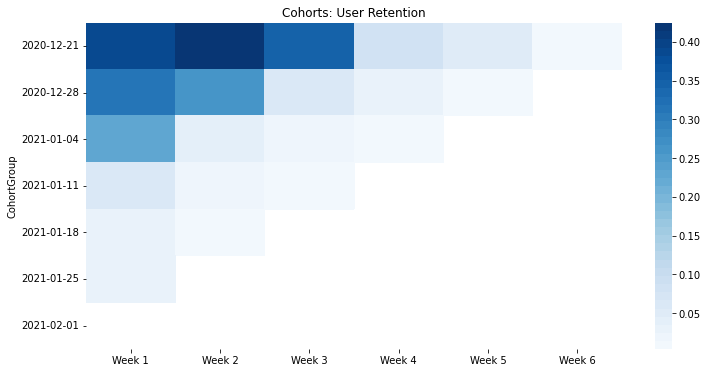

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Cohorts: User Retention')
heat_map = sns.heatmap(retention_6_per, cmap=sns.color_palette('Blues', 40))
figure = heat_map.get_figure()    
figure.savefig('user retention.png', dpi=1000)

In [ ]:
df_merged

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod
0,9.037520e+17,1771,3576,8,45328,@ofpeopl @agargmd Many people know the stopthe...,2021-01-28,0,0,0,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01
1,2.518376e+09,4,37,0,421,I'd say I'm shocked by just how naive/ignorant...,2021-01-28,0,0,0,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01
2,1.724066e+07,394,954,0,23278,And then there is Dave LaRock -- to be fair --...,2021-01-28,2,1,3,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01
3,1.900454e+07,289,471,2,34442,@govkristinoem Yes. Joe #NotMyPresident and he...,2021-01-28,0,0,1,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01
4,1.250970e+18,1727,2557,3,18984,@SenatorRomney We could've worked to #StopTheS...,2021-01-28,0,0,1,0,2021-01-28,2020-12-20,2020-12-21,2021-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66441,2.996814e+09,7,29,1,113,@SenTedCruz You are our last hope... Do what y...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21
66442,1.712432e+08,106,440,1,6148,"@jaketapper No judge has laughed, and she will...",2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21
66443,7.659790e+17,6129,1000,10,24696,True.\n\nBUT!!...\n\nEvery day YOU don’t fight...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21
66444,2.945379e+09,4139,4997,0,97757,#DoNotRatifyFraud!⚖️#StopTheSteal!\n*Demand Yo...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21


In [ ]:
df_merged['REPEAT_TIME'] = df_merged.groupby('author_id').cumcount() + 1
df_merged['REPEAT_TIME'].value_counts()


1       22702
2        7351
3        4268
4        2917
5        2203
        ...  
884         1
885         1
886         1
887         1
1300        1
Name: REPEAT_TIME, Length: 1300, dtype: int64

In [ ]:
df_merged['REPEAT_USER'] = 'Y'

In [ ]:
df_merged.loc[df_merged['REPEAT_TIME']==1, 'REPEAT_USER'] = 'N'

In [ ]:
#df_merged['REPEAT_USER_PROSPECTIVE']= df_merged.duplicated(subset=['author_id'], keep=False)

In [ ]:
df_merged

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_TIME,REPEAT_USER
0,9.037520e+17,1771,3576,8,45328,@ofpeopl @agargmd Many people know the stopthe...,2021-01-28,0,0,0,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01,1,N
1,2.518376e+09,4,37,0,421,I'd say I'm shocked by just how naive/ignorant...,2021-01-28,0,0,0,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01,1,N
2,1.724066e+07,394,954,0,23278,And then there is Dave LaRock -- to be fair --...,2021-01-28,2,1,3,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01,1,N
3,1.900454e+07,289,471,2,34442,@govkristinoem Yes. Joe #NotMyPresident and he...,2021-01-28,0,0,1,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01,1,N
4,1.250970e+18,1727,2557,3,18984,@SenatorRomney We could've worked to #StopTheS...,2021-01-28,0,0,1,0,2021-01-28,2020-12-20,2020-12-21,2021-02-01,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66441,2.996814e+09,7,29,1,113,@SenTedCruz You are our last hope... Do what y...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,1,N
66442,1.712432e+08,106,440,1,6148,"@jaketapper No judge has laughed, and she will...",2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,7,Y
66443,7.659790e+17,6129,1000,10,24696,True.\n\nBUT!!...\n\nEvery day YOU don’t fight...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,5,Y
66444,2.945379e+09,4139,4997,0,97757,#DoNotRatifyFraud!⚖️#StopTheSteal!\n*Demand Yo...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,214,Y


In [ ]:
import pandas

In [ ]:
pandas.set_option('display.max_rows', 50)

In [ ]:
grouped = df_merged.groupby(['CohortGroup', 'REPEAT_TIME']).agg({'author_id': pd.Series.nunique})

In [ ]:
grouped

author_id
CohortGroup REPEAT_TIME           
2020-12-21  1                 1975
            2                 1273
            3                 1004
            4                  808
            5                  681
...                            ...
2021-02-01  3                   11
            4                    3
            5                    2
            6                    1
            7                    1

[1909 rows x 1 columns]

In [ ]:
grouped = df_merged.groupby(['author_id', 'REPEAT_TIME', 'CohortGroup']).agg({'tweet_count': pd.Series.nunique})
grouped

tweet_count
author_id    REPEAT_TIME CohortGroup             
4.999000e+03 1           2020-12-28             1
6.463000e+03 1           2021-01-11             1
             2           2021-01-11             1
1.059700e+04 1           2020-12-21             1
2.928300e+04 1           2021-01-11             1
...                                           ...
1.354830e+18 1           2021-02-01             1
             2           2021-02-01             1
             3           2021-02-01             1
             4           2021-02-01             1
             5           2021-02-01             1

[66446 rows x 1 columns]

In [ ]:
df_merged

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_TIME,REPEAT_USER
0,9.037520e+17,1771,3576,8,45328,@ofpeopl @agargmd Many people know the stopthe...,2021-01-28,0,0,0,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01,1,N
1,2.518376e+09,4,37,0,421,I'd say I'm shocked by just how naive/ignorant...,2021-01-28,0,0,0,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01,1,N
2,1.724066e+07,394,954,0,23278,And then there is Dave LaRock -- to be fair --...,2021-01-28,2,1,3,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01,1,N
3,1.900454e+07,289,471,2,34442,@govkristinoem Yes. Joe #NotMyPresident and he...,2021-01-28,0,0,1,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01,1,N
4,1.250970e+18,1727,2557,3,18984,@SenatorRomney We could've worked to #StopTheS...,2021-01-28,0,0,1,0,2021-01-28,2020-12-20,2020-12-21,2021-02-01,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66441,2.996814e+09,7,29,1,113,@SenTedCruz You are our last hope... Do what y...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,1,N
66442,1.712432e+08,106,440,1,6148,"@jaketapper No judge has laughed, and she will...",2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,7,Y
66443,7.659790e+17,6129,1000,10,24696,True.\n\nBUT!!...\n\nEvery day YOU don’t fight...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,5,Y
66444,2.945379e+09,4139,4997,0,97757,#DoNotRatifyFraud!⚖️#StopTheSteal!\n*Demand Yo...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,214,Y


In [ ]:
retention_6

,Week 0,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6
CohortGroup,,,,,,,
2020-12-21,1975.0,758.0,839.0,684.0,158.0,94.0,27.0
2020-12-28,3324.0,1047.0,878.0,196.0,90.0,30.0,NaN
2021-01-04,5472.0,1239.0,234.0,106.0,21.0,NaN,NaN
2021-01-11,7219.0,408.0,165.0,56.0,NaN,NaN,NaN
2021-01-18,3354.0,108.0,38.0,NaN,NaN,NaN,NaN
2021-01-25,955.0,24.0,NaN,NaN,NaN,NaN,NaN
2021-02-01,403.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gk = retention_6.groupby('CohortGroup')

In [ ]:
gk.get_group('2020-12-21')

,Week 0,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6
CohortGroup,,,,,,,
2020-12-21,1975.0,758.0,839.0,684.0,158.0,94.0,27.0


In [ ]:
#get the number of distinct users that posted in each cohort in each week

In [ ]:
df_merged

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_TIME,REPEAT_USER
0,9.037520e+17,1771,3576,8,45328,@ofpeopl @agargmd Many people know the stopthe...,2021-01-28,0,0,0,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01,1,N
1,2.518376e+09,4,37,0,421,I'd say I'm shocked by just how naive/ignorant...,2021-01-28,0,0,0,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01,1,N
2,1.724066e+07,394,954,0,23278,And then there is Dave LaRock -- to be fair --...,2021-01-28,2,1,3,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01,1,N
3,1.900454e+07,289,471,2,34442,@govkristinoem Yes. Joe #NotMyPresident and he...,2021-01-28,0,0,1,0,2021-01-28,2021-01-28,2021-02-01,2021-02-01,1,N
4,1.250970e+18,1727,2557,3,18984,@SenatorRomney We could've worked to #StopTheS...,2021-01-28,0,0,1,0,2021-01-28,2020-12-20,2020-12-21,2021-02-01,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66441,2.996814e+09,7,29,1,113,@SenTedCruz You are our last hope... Do what y...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,1,N
66442,1.712432e+08,106,440,1,6148,"@jaketapper No judge has laughed, and she will...",2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,7,Y
66443,7.659790e+17,6129,1000,10,24696,True.\n\nBUT!!...\n\nEvery day YOU don’t fight...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,5,Y
66444,2.945379e+09,4139,4997,0,97757,#DoNotRatifyFraud!⚖️#StopTheSteal!\n*Demand Yo...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,214,Y


**We focus on the first cohort group then subposting periods within the cohort**

In [ ]:
df_merged["CohortGroup"].nunique()

7

In [ ]:
df_merged['CohortGroup'].head()

0    2021-02-01
1    2021-02-01
2    2021-02-01
3    2021-02-01
4    2020-12-21
Name: CohortGroup, dtype: object

In [ ]:
df_merged['CohortGroup'].value_counts()

2020-12-21    21657
2020-12-28    13138
2021-01-04    13082
2021-01-11    12641
2021-01-18     4327
2021-01-25     1148
2021-02-01      453
Name: CohortGroup, dtype: int64

In [ ]:
df_merged.groupby(['CohortGroup'])

In [ ]:
CohortGroup_grp = df_merged.groupby(['CohortGroup'])

In [ ]:
CohortGroup_grp.get_group('2020-12-21')

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_TIME,REPEAT_USER
4,1.250970e+18,1727,2557,3,18984,@SenatorRomney We could've worked to #StopTheS...,2021-01-28,0,0,1,0,2021-01-28,2020-12-20,2020-12-21,2021-02-01,1,N
5,7.559430e+17,2925,4094,37,134964,Nancy Pelosi gets away with saying “the enemy ...,2021-01-28,2,1,5,0,2021-01-28,2020-12-20,2020-12-21,2021-02-01,1,N
14,6.327930e+08,41689,4234,844,31474,#StopTheSteal rallies increased ahead of the i...,2021-01-28,1,0,7,0,2021-01-28,2020-12-20,2020-12-21,2021-02-01,1,N
37,1.322750e+18,193,182,4,2481,The Obama administration had 14 million POTUS ...,2021-01-28,0,1,0,0,2021-01-28,2020-12-20,2020-12-21,2021-02-01,1,N
56,3.033155e+09,7247,7754,76,63134,Hahaha that’s funny because the cartel corpora...,2021-01-28,3,0,2,0,2021-01-28,2020-12-20,2020-12-21,2021-02-01,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66441,2.996814e+09,7,29,1,113,@SenTedCruz You are our last hope... Do what y...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,1,N
66442,1.712432e+08,106,440,1,6148,"@jaketapper No judge has laughed, and she will...",2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,7,Y
66443,7.659790e+17,6129,1000,10,24696,True.\n\nBUT!!...\n\nEvery day YOU don’t fight...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,5,Y
66444,2.945379e+09,4139,4997,0,97757,#DoNotRatifyFraud!⚖️#StopTheSteal!\n*Demand Yo...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,214,Y


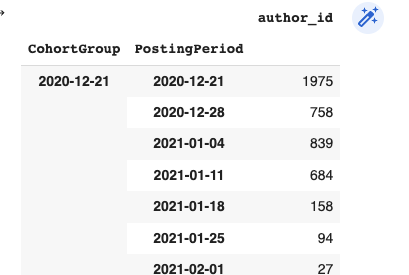

**First period analysis.   2020-12-21**

In [ ]:
df_merged["PostingPeriod"].nunique()
df_merged['PostingPeriod'].head()
df_merged['PostingPeriod'].value_counts()
df_merged.groupby(['PostingPeriod'])
CohortGroup_grp = df_merged.groupby(['PostingPeriod'])
CohortGroup_grp.get_group('2020-12-21')

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_TIME,REPEAT_USER
62094,1.025990e+18,100,115,3,61245,@Richard60355644 @realtrumpweathr @realDonaldT...,2020-12-21,0,0,0,0,2020-12-21,2020-12-20,2020-12-21,2020-12-21,513,Y
62095,1.278280e+18,1424,2403,4,10910,@CharlesStrain14 I miss not hearing from Q . H...,2020-12-21,0,0,0,0,2020-12-21,2020-12-21,2020-12-21,2020-12-21,6,Y
62096,3.115886e+09,45,114,3,421,President Trump is giving everyone a chance to...,2020-12-21,0,0,1,0,2020-12-21,2020-12-20,2020-12-21,2020-12-21,21,Y
62097,1.332730e+18,137,0,1,2336,Is this the voter fraud you keep talking about...,2020-12-21,0,0,1,0,2020-12-21,2020-12-21,2020-12-21,2020-12-21,1,N
62098,1.189920e+18,658,336,0,17235,"January 6, 2021 \n“One Way Or Another History ...",2020-12-21,0,0,0,0,2020-12-21,2020-12-20,2020-12-21,2020-12-21,36,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66441,2.996814e+09,7,29,1,113,@SenTedCruz You are our last hope... Do what y...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,1,N
66442,1.712432e+08,106,440,1,6148,"@jaketapper No judge has laughed, and she will...",2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,7,Y
66443,7.659790e+17,6129,1000,10,24696,True.\n\nBUT!!...\n\nEvery day YOU don’t fight...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,5,Y
66444,2.945379e+09,4139,4997,0,97757,#DoNotRatifyFraud!⚖️#StopTheSteal!\n*Demand Yo...,2020-12-20,0,0,0,0,2020-12-20,2020-12-20,2020-12-21,2020-12-21,214,Y


In [ ]:
df_merged = CohortGroup_grp.get_group('2021-01-04')

In [ ]:
df_merged

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_TIME,REPEAT_USER
31107,2.743196e+08,2991,4999,35,19294,@IlhanMN President-elect Joe Biden promised Mo...,2021-01-04,0,0,0,0,2021-01-04,2020-12-26,2020-12-28,2021-01-04,3,Y
31108,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,32,Y
31109,1.125630e+18,31,256,0,7006,FIGHT NEVER GIVE UP!!!! #StopTheSteal https://...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,3,Y
31110,1.577883e+07,326,948,2,38072,@LindseyGrahamSC time to stand up and #stopthe...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,9,Y
31111,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,33,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,6.990230e+17,1063,5000,35,69361,@SenRickScott Rick: WE The People Agree And D...,2020-12-29,0,0,0,0,2020-12-29,2020-12-22,2020-12-28,2021-01-04,19,Y
50915,1.139270e+18,2769,4984,11,31035,Breaking News #StopTheinsanity ~ #TrumpIsNotW...,2020-12-29,1,0,0,0,2020-12-29,2020-12-21,2020-12-21,2021-01-04,25,Y
50916,2.777102e+09,1151,1503,5,30992,@HernanMejia @MajorPatriot He’s right you know...,2020-12-29,1,0,1,0,2020-12-29,2020-12-26,2020-12-28,2021-01-04,8,Y
50917,8.233130e+17,4068,4662,3,101639,@mtgreenee @BrendaGanues @realDonaldTrump Hey ...,2020-12-29,0,0,0,0,2020-12-29,2020-12-24,2020-12-28,2021-01-04,14,Y


In [ ]:
#https://github.com/DataScienceProjects-Shir/Cohort-Analysis-Bike-Data/blob/main/Cohort%20Analysis.ipynb

In [ ]:
'''
df = pd.DataFrame(df)
start_date = '2020-12-15 23:54:51+00:00'
end_date = '2021-04-01 00:00:00+00:00'
# Select DataFrame rows between two dates
mask = (df['created_at'] > start_date) & (df['created_at'] <= end_date)
cluster_data = df.loc[mask]
'''

"\ndf = pd.DataFrame(df)\nstart_date = '2020-12-15 23:54:51+00:00'\nend_date = '2021-04-01 00:00:00+00:00'\n# Select DataFrame rows between two dates\nmask = (df['created_at'] > start_date) & (df['created_at'] <= end_date)\ncluster_data = df.loc[mask]\n"

In [ ]:
#split_date ='2021-01-01T22:49:01.000Z' # move the date a week after for every iteration split_date ='2022-02-06 14:54:58+00:00' # move the date a week after for every iteration 
#split_date ='2021-04-30T22:49:01.000Z' # move the date a week after for every iteration 
#split_date ='2021-04-30T22:49:01.000Z' # move the date a week after for every iteration 
#split_date ='2021-04-30T22:49:01.000Z' # move the date a week after for every iteration 
#split_date ='2021-04-30T22:49:01.000Z' # move the date a week after for every iteration 

#cluster_data = df.loc[df['created_at'] <= split_date]
#validation_data = dve_df.loc[dve_df['created_at'] > split_date]

In [ ]:
#df.rename(columns = {'author_followers':'followers_count','author_followee':'following_count','author_tweets':'tweet_count','likes':'like_count'}, inplace = True)
#df

The closer you are to January 6th 2021, the more users you get. 





In [ ]:
#split_date ='2020-12-30 14:54:58+00:00' # move the date a week after for every iteration split_date ='2022-02-06 14:54:58+00:00' # move the date a week after for every iteration 
#split_date ='2022-02-12 14:54:58+00:00' # move the date a week after for every iteration 
#split_date ='2022-02-20 14:54:58+00:00' # move the date a week after for every iteration 
#split_date ='2022-02-27 14:54:58+00:00' # move the date a week after for every iteration 
#split_date ='2022-03-06 14:54:58+00:00' # move the date a week after for every iteration 

#cluster_data = df.loc[df['created_at'] <= split_date]
#validation_data = dve_df.loc[dve_df['created_at'] > split_date]

In [ ]:
df_merged.replace(np.nan, 0, inplace = True)

In [ ]:
#cluster_data.dropna(inplace=True)

In [ ]:
#cluster_data.head(5)

In [ ]:
#cluster_data.tail(3)

In [ ]:
#df_merged.columns = df_merged.columns.str.strip()

In [ ]:
#non_numeric_columns = list(set(df_merged.columns)-set(df_merged._get_numeric_data().columns))
#df_merged[non_numeric_columns] = df_merged[non_numeric_columns].apply(lambda x : str(x).strip())

In [ ]:
#df_merged["created_at_dt"] = df_merged["created_at"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S+00:00").replace(tzinfo=None))

#df_merged["created_at_dt"] = df_merged["created_at"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.000Z").replace(tzinfo=None))
#df_merged["survivability"] = df_merged["cohort"].apply(lambda x: (datetime.datetime.now()-x).days)

In [ ]:
pd.set_option('display.max_columns', None)
#cluster_data

# Calculating User Features

In [ ]:
# settings to display all columns
#pd.set_option("display.max_columns", None)
# display the dataframe head
#cluster_data.head()

In [ ]:
df_merged['folws_stat_foloing_rt']=df_merged['followers_count']**2+df_merged['following_count']-df_merged['following_count']
df_merged['Influence']=np.log(df_merged['folws_stat_foloing_rt']+1)

In [ ]:
df_merged['followee_followers_rt']=df_merged["following_count"]+1/df_merged["followers_count"]+1
df_merged['sociability']=np.log(df_merged['followee_followers_rt']+1)

df_merged['likes_tweets_rt']=df_merged["like_count"]+1/df_merged["tweet_count"]+1
df_merged['favorabilty']=np.log(df_merged['likes_tweets_rt']+1)

#df_merged["survivability"] = df_merged["created_at_dt"].apply(lambda x: (datetime.datetime.now()-x).days)

#df_merged["tw_dy_rt"] = df_merged["tweet_count"]+1/df_merged["survivability"]+1
#df_merged["activiness"] = np.log(df_merged['tw_dy_rt']+1)


In [ ]:

#cluster_data.drop('created_at', axis=1, inplace=True)
#cluster_data.drop('created_at_dt', axis=1, inplace=True)
'''
del cluster_data['folws_stat_foloing_rt']
del cluster_data['followee_followers_rt']
del cluster_data['likes_tweets_rt']
del cluster_data['tw_dy_rt']
#del cluster_data['users_verified']
#del cluster_data['urls_end']
del cluster_data['like_count']
#del cluster_data['reply_count']
#del cluster_data['mentions']
del cluster_data['listed_count']
del cluster_data['retweets']
'''

"\ndel cluster_data['folws_stat_foloing_rt']\ndel cluster_data['followee_followers_rt']\ndel cluster_data['likes_tweets_rt']\ndel cluster_data['tw_dy_rt']\n#del cluster_data['users_verified']\n#del cluster_data['urls_end']\ndel cluster_data['like_count']\n#del cluster_data['reply_count']\n#del cluster_data['mentions']\ndel cluster_data['listed_count']\ndel cluster_data['retweets']\n"

In [ ]:
#droppig na if any
df_merged = df_merged.dropna(how = 'any')
df_merged.head(5)
df_merged.fillna(0)
df_merged.fillna(0,inplace=True)
df_merged.fillna(0,inplace=True)
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)
df_merged.replace(np.nan, 0)

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_TIME,REPEAT_USER,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty
31107,2.743196e+08,2991,4999,35,19294,@IlhanMN President-elect Joe Biden promised Mo...,2021-01-04,0,0,0,0,2021-01-04,2020-12-26,2020-12-28,2021-01-04,3,Y,8946081,16.006726,5000.000334,8.517393,1.000052,0.693173
31108,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,32,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435
31109,1.125630e+18,31,256,0,7006,FIGHT NEVER GIVE UP!!!! #StopTheSteal https://...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,3,Y,961,6.869014,257.032258,5.553085,1.000143,0.693219
31110,1.577883e+07,326,948,2,38072,@LindseyGrahamSC time to stand up and #stopthe...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,9,Y,106276,11.573804,949.003067,6.856465,1.000026,0.693160
31111,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,33,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,6.990230e+17,1063,5000,35,69361,@SenRickScott Rick: WE The People Agree And D...,2020-12-29,0,0,0,0,2020-12-29,2020-12-22,2020-12-28,2021-01-04,19,Y,1129969,13.937702,5001.000941,8.517593,1.000014,0.693154
50915,1.139270e+18,2769,4984,11,31035,Breaking News #StopTheinsanity ~ #TrumpIsNotW...,2020-12-29,1,0,0,0,2020-12-29,2020-12-21,2020-12-21,2021-01-04,25,Y,7667361,15.852483,4985.000361,8.514389,1.000032,0.693163
50916,2.777102e+09,1151,1503,5,30992,@HernanMejia @MajorPatriot He’s right you know...,2020-12-29,1,0,1,0,2020-12-29,2020-12-26,2020-12-28,2021-01-04,8,Y,1324801,14.096774,1504.000869,7.316549,2.000032,1.098623
50917,8.233130e+17,4068,4662,3,101639,@mtgreenee @BrendaGanues @realDonaldTrump Hey ...,2020-12-29,0,0,0,0,2020-12-29,2020-12-24,2020-12-28,2021-01-04,14,Y,16548624,16.621814,4663.000246,8.447629,1.000010,0.693152


In [ ]:
#cluster_data.drop_duplicates(subset=['author_id'], inplace=True)
#cluster_data.drop('created_at', axis=1, inplace=True)
#cluster_data.drop('created_at_dt', axis=1, inplace=True)
#cluster_data.drop('folws_stat_foloing_rt', axis=1, inplace=True)
#cluster_data.drop('followee_followers_rt', axis=1, inplace=True)
#cluster_data.drop('likes_tweets_rt', axis=1, inplace=True)
#cluster_data.drop('tw_dy_rt', axis=1, inplace=True)

df_merged

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_TIME,REPEAT_USER,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty
31107,2.743196e+08,2991,4999,35,19294,@IlhanMN President-elect Joe Biden promised Mo...,2021-01-04,0,0,0,0,2021-01-04,2020-12-26,2020-12-28,2021-01-04,3,Y,8946081,16.006726,5000.000334,8.517393,1.000052,0.693173
31108,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,32,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435
31109,1.125630e+18,31,256,0,7006,FIGHT NEVER GIVE UP!!!! #StopTheSteal https://...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,3,Y,961,6.869014,257.032258,5.553085,1.000143,0.693219
31110,1.577883e+07,326,948,2,38072,@LindseyGrahamSC time to stand up and #stopthe...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,9,Y,106276,11.573804,949.003067,6.856465,1.000026,0.693160
31111,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,33,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,6.990230e+17,1063,5000,35,69361,@SenRickScott Rick: WE The People Agree And D...,2020-12-29,0,0,0,0,2020-12-29,2020-12-22,2020-12-28,2021-01-04,19,Y,1129969,13.937702,5001.000941,8.517593,1.000014,0.693154
50915,1.139270e+18,2769,4984,11,31035,Breaking News #StopTheinsanity ~ #TrumpIsNotW...,2020-12-29,1,0,0,0,2020-12-29,2020-12-21,2020-12-21,2021-01-04,25,Y,7667361,15.852483,4985.000361,8.514389,1.000032,0.693163
50916,2.777102e+09,1151,1503,5,30992,@HernanMejia @MajorPatriot He’s right you know...,2020-12-29,1,0,1,0,2020-12-29,2020-12-26,2020-12-28,2021-01-04,8,Y,1324801,14.096774,1504.000869,7.316549,2.000032,1.098623
50917,8.233130e+17,4068,4662,3,101639,@mtgreenee @BrendaGanues @realDonaldTrump Hey ...,2020-12-29,0,0,0,0,2020-12-29,2020-12-24,2020-12-28,2021-01-04,14,Y,16548624,16.621814,4663.000246,8.447629,1.000010,0.693152


In [ ]:
#cluster_data.to_csv('/content/toweka.csv')

In [ ]:
#missing values
missing_values = df_merged.isna().sum()
missing_values

author_id                  0
followers_count            0
following_count            0
listed_count               0
tweet_count                0
text                       0
created_at                 0
retweet_count              0
reply_count                0
like_count                 0
quote_count                0
created_at_month           0
cohort                     0
CohortGroup                0
PostingPeriod              0
REPEAT_TIME                0
REPEAT_USER                0
folws_stat_foloing_rt      0
Influence                  0
followee_followers_rt    229
sociability              229
likes_tweets_rt            0
favorabilty                0
dtype: int64

In [ ]:
#df_merged = df_merged.fillna(df_merged['sociability'].median())
#df_merged = df_merged.fillna(df_merged['favorabilty'].median())
#cluster_data = cluster_data.fillna(cluster_data['users_verified'].median())
#cluster_data = cluster_data.fillna(cluster_data['urls__end'].median())
#cluster_data = cluster_data.fillna(cluster_data['hashtags_end'].median())
#cluster_data = cluster_data.fillna(cluster_data['followers_count'].median())
#cluster_data = cluster_data.fillna(cluster_data['following_count'].median())
#cluster_data = cluster_data.fillna(cluster_data['tweet_count'].median())
#cluster_data = cluster_data.fillna(cluster_data['listed_count'].median())
#cluster_data = cluster_data.fillna(cluster_data['urls_end'].median())

In [ ]:
#missing values
missing_values = df_merged.isna().sum()
missing_values

author_id                  0
followers_count            0
following_count            0
listed_count               0
tweet_count                0
text                       0
created_at                 0
retweet_count              0
reply_count                0
like_count                 0
quote_count                0
created_at_month           0
cohort                     0
CohortGroup                0
PostingPeriod              0
REPEAT_TIME                0
REPEAT_USER                0
folws_stat_foloing_rt      0
Influence                  0
followee_followers_rt    229
sociability              229
likes_tweets_rt            0
favorabilty                0
dtype: int64

In [ ]:
# Displaying the Co-relation between the various attributes/features
corr_map = df_merged.corr()
corr_map

,author_id,followers_count,following_count,listed_count,tweet_count,retweet_count,reply_count,like_count,quote_count,REPEAT_TIME,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty
author_id,1.000000,-0.051052,-0.125228,-0.113564,-0.187348,-0.014624,-0.015061,-0.016427,-0.012005,-0.162224,-0.017475,-0.381486,-0.120978,-0.324052,-0.016424,-0.072148
followers_count,-0.051052,1.000000,0.226431,0.680874,0.183719,0.210504,0.140951,0.196341,0.207559,-0.015531,0.892451,0.253525,0.226108,0.109845,0.196341,0.382687
following_count,-0.125228,0.226431,1.000000,0.273534,0.471269,0.035918,0.019379,0.032555,0.029982,-0.042703,0.049623,0.446801,1.000000,0.490899,0.032554,0.205732
listed_count,-0.113564,0.680874,0.273534,1.000000,0.240971,0.109916,0.087644,0.101193,0.106339,0.034832,0.545709,0.299381,0.273106,0.176116,0.101193,0.272556
tweet_count,-0.187348,0.183719,0.471269,0.240971,1.000000,0.000232,-0.002373,-0.000252,-0.001255,-0.023369,0.055865,0.436286,0.470200,0.353643,-0.000254,0.090175
retweet_count,-0.014624,0.210504,0.035918,0.109916,0.000232,1.000000,0.848197,0.961160,0.908389,-0.010962,0.089029,0.084990,0.035792,0.029926,0.961160,0.385250
reply_count,-0.015061,0.140951,0.019379,0.087644,-0.002373,0.848197,1.000000,0.862271,0.829202,-0.007622,0.048222,0.057292,0.019291,0.018486,0.862271,0.270784
like_count,-0.016427,0.196341,0.032555,0.101193,-0.000252,0.961160,0.862271,1.000000,0.856421,-0.010684,0.085701,0.081754,0.032431,0.027375,1.000000,0.378262
quote_count,-0.012005,0.207559,0.029982,0.106339,-0.001255,0.908389,0.829202,0.856421,1.000000,-0.010467,0.081230,0.080293,0.029862,0.023488,0.856421,0.363267
REPEAT_TIME,-0.162224,-0.015531,-0.042703,0.034832,-0.023369,-0.010962,-0.007622,-0.010684,-0.010467,1.000000,-0.007642,-0.011311,-0.042919,-0.023576,-0.010685,-0.046174


In [ ]:
# Displaying the Co-variance between the various attributes/features
df_merged.cov()

,author_id,followers_count,following_count,listed_count,tweet_count,retweet_count,reply_count,like_count,quote_count,REPEAT_TIME,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty
author_id,3.121504e+35,-1.134163e+21,-4.621329e+20,-2.159058e+19,-7.829878e+21,-1.005523e+18,-9.155688e+17,-4.278969e+18,-1.160727e+17,-1.144111e+19,-6.361477e+26,-1.008010e+18,-4.453502e+20,-3.202819e+17,-4.278268e+18,-2.799650e+16
followers_count,-1.134163e+21,1.581082e+09,5.946988e+07,9.212652e+06,5.464568e+08,1.030137e+06,6.098290e+05,3.639857e+06,1.428193e+05,-7.795414e+04,2.312213e+15,4.767632e+04,6.002696e+07,7.829480e+03,3.639852e+06,1.056865e+04
following_count,-4.621329e+20,5.946988e+07,4.362834e+07,6.148043e+05,2.328510e+08,2.919830e+04,1.392752e+04,1.002530e+05,3.426992e+03,-3.560495e+04,2.135649e+13,1.395735e+04,4.406876e+07,5.808268e+03,1.002503e+05,9.438095e+02
listed_count,-2.159058e+19,9.212652e+06,6.148043e+05,1.157927e+05,6.133799e+06,4.603180e+03,3.245081e+03,1.605418e+04,6.261810e+02,1.496211e+03,1.209951e+13,4.818024e+02,6.204361e+05,1.074209e+02,1.605411e+04,6.441629e+01
tweet_count,-7.829878e+21,5.464568e+08,2.328510e+08,6.133799e+06,5.595635e+09,2.133792e+03,-1.931779e+04,-8.805481e+03,-1.624924e+03,-2.206629e+05,2.722914e+14,1.543478e+05,2.345236e+08,4.735793e+04,-8.849345e+03,4.684994e+03
retweet_count,-1.005523e+18,1.030137e+06,2.919830e+04,4.603180e+03,2.133792e+03,1.514653e+04,1.135836e+04,5.515040e+04,1.934625e+03,-1.702991e+02,7.139309e+11,4.946831e+01,2.941271e+04,6.602665e+00,5.515039e+04,3.293053e+01
reply_count,-9.155688e+17,6.098290e+05,1.392752e+04,3.245081e+03,-1.931779e+04,1.135836e+04,1.183927e+04,4.374242e+04,1.561317e+03,-1.046864e+02,3.418789e+11,2.948219e+01,1.401572e+04,3.605853e+00,4.374241e+04,2.046371e+01
like_count,-4.278969e+18,3.639857e+06,1.002530e+05,1.605418e+04,-8.805481e+03,5.515040e+04,4.374242e+04,2.173666e+05,6.909584e+03,-6.287807e+02,2.603438e+12,1.802645e+02,1.009585e+05,2.288026e+01,2.173665e+05,1.224866e+02
quote_count,-1.160727e+17,1.428193e+05,3.426992e+03,6.261810e+02,-1.624924e+03,1.934625e+03,1.561317e+03,6.909584e+03,2.994586e+02,-2.286382e+01,9.159010e+10,6.571260e+00,3.450391e+03,7.286445e-01,6.909583e+03,4.366099e+00
REPEAT_TIME,-1.144111e+19,-7.795414e+04,-3.560495e+04,1.496211e+03,-2.206629e+05,-1.702991e+02,-1.046864e+02,-6.287807e+02,-2.286382e+01,1.593473e+04,-6.285250e+10,-6.752835e+00,-3.614854e+04,-5.331222e+00,-6.288260e+02,-4.048232e+00


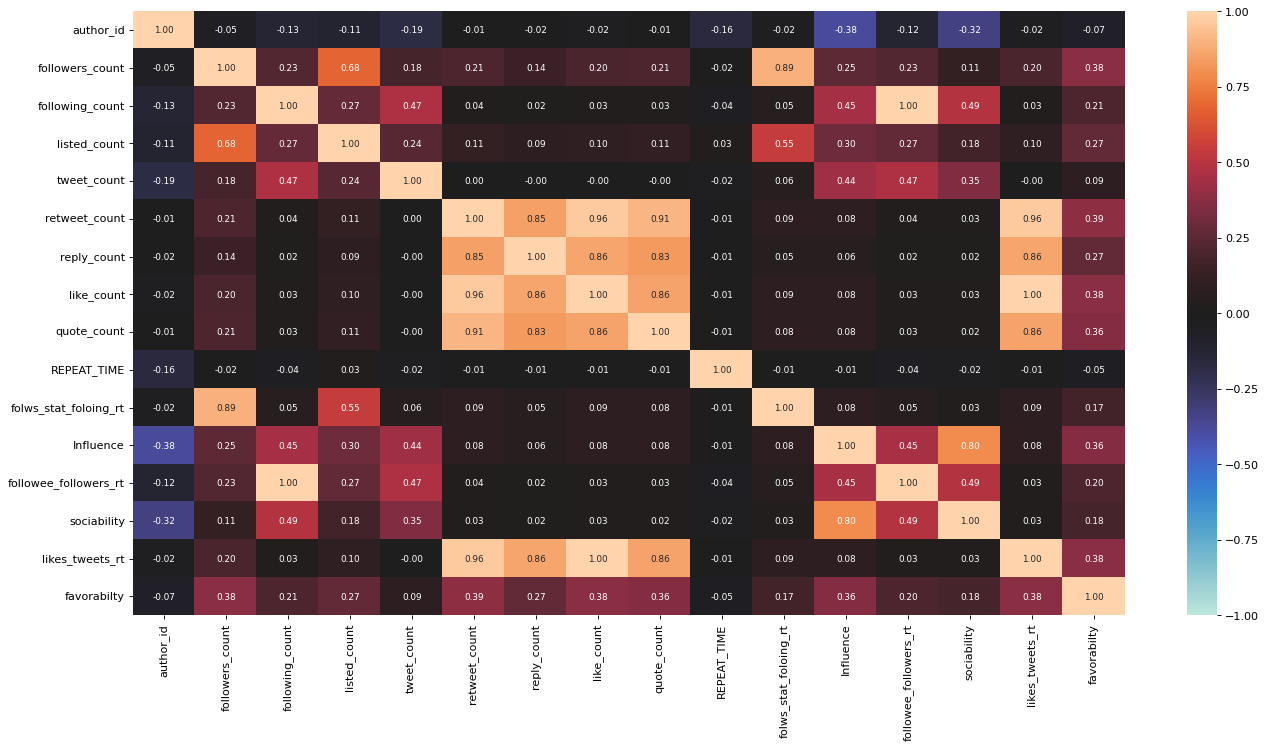

In [ ]:
# Visualising the Co-relation Heatmap between the various attributes/features
plt.figure(figsize=(20,10), dpi=80)
sns.heatmap(corr_map, vmin=-1, vmax=1, center=0, annot=True, annot_kws={'size':8}, fmt='.2f')

##dropping links, name and timing column

In [ ]:
#dropping unneccesary column
#cluster_data = cluster_data.drop(['Name','Links', 'Timings'],axis = 1)
#cluster_data.head()

##Dropping Duplicates

In [ ]:
#dropping duplicates
#df_merged.drop_duplicates(inplace = True)
#df_merged.shape

##Handeling nan values in collection column

In [ ]:
# replacing nan values
#cluster_data['quote_count'] = cluster_data['quote_count'].replace(np.nan , "Unknown", regex=True)

In [ ]:
#cluster_data.tail()

In [ ]:
df_merged.head(5)
df_merged.fillna(0)

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_TIME,REPEAT_USER,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty
31107,2.743196e+08,2991,4999,35,19294,@IlhanMN President-elect Joe Biden promised Mo...,2021-01-04,0,0,0,0,2021-01-04,2020-12-26,2020-12-28,2021-01-04,3,Y,8946081,16.006726,5000.000334,8.517393,1.000052,0.693173
31108,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,32,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435
31109,1.125630e+18,31,256,0,7006,FIGHT NEVER GIVE UP!!!! #StopTheSteal https://...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,3,Y,961,6.869014,257.032258,5.553085,1.000143,0.693219
31110,1.577883e+07,326,948,2,38072,@LindseyGrahamSC time to stand up and #stopthe...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,9,Y,106276,11.573804,949.003067,6.856465,1.000026,0.693160
31111,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,33,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,6.990230e+17,1063,5000,35,69361,@SenRickScott Rick: WE The People Agree And D...,2020-12-29,0,0,0,0,2020-12-29,2020-12-22,2020-12-28,2021-01-04,19,Y,1129969,13.937702,5001.000941,8.517593,1.000014,0.693154
50915,1.139270e+18,2769,4984,11,31035,Breaking News #StopTheinsanity ~ #TrumpIsNotW...,2020-12-29,1,0,0,0,2020-12-29,2020-12-21,2020-12-21,2021-01-04,25,Y,7667361,15.852483,4985.000361,8.514389,1.000032,0.693163
50916,2.777102e+09,1151,1503,5,30992,@HernanMejia @MajorPatriot He’s right you know...,2020-12-29,1,0,1,0,2020-12-29,2020-12-26,2020-12-28,2021-01-04,8,Y,1324801,14.096774,1504.000869,7.316549,2.000032,1.098623
50917,8.233130e+17,4068,4662,3,101639,@mtgreenee @BrendaGanues @realDonaldTrump Hey ...,2020-12-29,0,0,0,0,2020-12-29,2020-12-24,2020-12-28,2021-01-04,14,Y,16548624,16.621814,4663.000246,8.447629,1.000010,0.693152


In [ ]:
#droppig na if any
df_merged = df_merged.dropna(how = 'any')

In [ ]:
df_merged.fillna(0,inplace=True)


# Sentiment Analysis


In [ ]:
import re

In [ ]:
# Cleaning the tweet
def cleanText(text):
    # Removing @mentions
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    
    # Removing the # symbol
    text=re.sub(r'#','',text)
    
    # Removing RT & immediate space after it, RT symbolises Retweet
    text=re.sub(r'RT[\s]+','',text)
    
    # Removing the hyperlink
    text=re.sub(r'https?:\/\/','',text)
    
    return text

df_merged['Cleaning_Tweets']=df_merged['text']

# Appyling clean function on text observed
df_merged['Cleaning_Tweets']=df_merged['Cleaning_Tweets'].apply(cleanText)


# Display cleaned text
df_merged  

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_TIME,REPEAT_USER,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty,Cleaning_Tweets
31107,2.743196e+08,2991,4999,35,19294,@IlhanMN President-elect Joe Biden promised Mo...,2021-01-04,0,0,0,0,2021-01-04,2020-12-26,2020-12-28,2021-01-04,3,Y,8946081,16.006726,5000.000334,8.517393,1.000052,0.693173,President-elect Joe Biden promised Monday in ...
31108,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,32,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435,irl live news livestream stopthesteal LIVE:01...
31109,1.125630e+18,31,256,0,7006,FIGHT NEVER GIVE UP!!!! #StopTheSteal https://...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,3,Y,961,6.869014,257.032258,5.553085,1.000143,0.693219,FIGHT NEVER GIVE UP!!!! StopTheSteal t.co/Oqka...
31110,1.577883e+07,326,948,2,38072,@LindseyGrahamSC time to stand up and #stopthe...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,9,Y,106276,11.573804,949.003067,6.856465,1.000026,0.693160,time to stand up and stopthesteal t.co/VEkIky...
31111,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,33,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435,irl live news livestream stopthesteal LIVE:01...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,6.990230e+17,1063,5000,35,69361,@SenRickScott Rick: WE The People Agree And D...,2020-12-29,0,0,0,0,2020-12-29,2020-12-22,2020-12-28,2021-01-04,19,Y,1129969,13.937702,5001.000941,8.517593,1.000014,0.693154,Rick: WE The People Agree And DEMAND YOU UPH...
50915,1.139270e+18,2769,4984,11,31035,Breaking News #StopTheinsanity ~ #TrumpIsNotW...,2020-12-29,1,0,0,0,2020-12-29,2020-12-21,2020-12-21,2021-01-04,25,Y,7667361,15.852483,4985.000361,8.514389,1.000032,0.693163,Breaking News StopTheinsanity ~ TrumpIsNotWel...
50916,2.777102e+09,1151,1503,5,30992,@HernanMejia @MajorPatriot He’s right you know...,2020-12-29,1,0,1,0,2020-12-29,2020-12-26,2020-12-28,2021-01-04,8,Y,1324801,14.096774,1504.000869,7.316549,2.000032,1.098623,He’s right you know! The democrats didn’t ju...
50917,8.233130e+17,4068,4662,3,101639,@mtgreenee @BrendaGanues @realDonaldTrump Hey ...,2020-12-29,0,0,0,0,2020-12-29,2020-12-24,2020-12-28,2021-01-04,14,Y,16548624,16.621814,4663.000246,8.447629,1.000010,0.693152,Hey you RINO . Get on board or get out. N...


In [ ]:
# Cleaning the tweet
def cleanText(text):
    # Removing @mentions
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    
    # Removing the # symbol
    text=re.sub(r'#','',text)
    
    # Removing RT & immediate space after it, RT symbolises Retweet
    text=re.sub(r'RT[\s]+','',text)
    
    # Removing the hyperlink
    text=re.sub(r'https?:\/\/','',text)
    
    return text


# Appyling clean function on text observed
df_merged['Cleaning_Tweets']=df_merged['Cleaning_Tweets'].apply(cleanText)


# Display cleaned text
df_merged  

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_TIME,REPEAT_USER,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty,Cleaning_Tweets
31107,2.743196e+08,2991,4999,35,19294,@IlhanMN President-elect Joe Biden promised Mo...,2021-01-04,0,0,0,0,2021-01-04,2020-12-26,2020-12-28,2021-01-04,3,Y,8946081,16.006726,5000.000334,8.517393,1.000052,0.693173,President-elect Joe Biden promised Monday in ...
31108,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,32,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435,irl live news livestream stopthesteal LIVE:01...
31109,1.125630e+18,31,256,0,7006,FIGHT NEVER GIVE UP!!!! #StopTheSteal https://...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,3,Y,961,6.869014,257.032258,5.553085,1.000143,0.693219,FIGHT NEVER GIVE UP!!!! StopTheSteal t.co/Oqka...
31110,1.577883e+07,326,948,2,38072,@LindseyGrahamSC time to stand up and #stopthe...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,9,Y,106276,11.573804,949.003067,6.856465,1.000026,0.693160,time to stand up and stopthesteal t.co/VEkIky...
31111,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,33,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435,irl live news livestream stopthesteal LIVE:01...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,6.990230e+17,1063,5000,35,69361,@SenRickScott Rick: WE The People Agree And D...,2020-12-29,0,0,0,0,2020-12-29,2020-12-22,2020-12-28,2021-01-04,19,Y,1129969,13.937702,5001.000941,8.517593,1.000014,0.693154,Rick: WE The People Agree And DEMAND YOU UPH...
50915,1.139270e+18,2769,4984,11,31035,Breaking News #StopTheinsanity ~ #TrumpIsNotW...,2020-12-29,1,0,0,0,2020-12-29,2020-12-21,2020-12-21,2021-01-04,25,Y,7667361,15.852483,4985.000361,8.514389,1.000032,0.693163,Breaking News StopTheinsanity ~ TrumpIsNotWel...
50916,2.777102e+09,1151,1503,5,30992,@HernanMejia @MajorPatriot He’s right you know...,2020-12-29,1,0,1,0,2020-12-29,2020-12-26,2020-12-28,2021-01-04,8,Y,1324801,14.096774,1504.000869,7.316549,2.000032,1.098623,He’s right you know! The democrats didn’t ju...
50917,8.233130e+17,4068,4662,3,101639,@mtgreenee @BrendaGanues @realDonaldTrump Hey ...,2020-12-29,0,0,0,0,2020-12-29,2020-12-24,2020-12-28,2021-01-04,14,Y,16548624,16.621814,4663.000246,8.447629,1.000010,0.693152,Hey you RINO . Get on board or get out. N...


In [ ]:
import pandas as pd
import numpy as np

import tweepy
import re

from textblob import TextBlob
from wordcloud import WordCloud

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


# Creating 2 columns : Subjectivity & Polarity
df_merged['Subjectivity']=df_merged['Cleaning_Tweets'].apply(getSubjectivity)
df_merged['Polarity']=df_merged['Cleaning_Tweets'].apply(getPolarity)

# Displaying updated dataframe
df_merged

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_TIME,REPEAT_USER,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty,Cleaning_Tweets,Subjectivity,Polarity
31107,2.743196e+08,2991,4999,35,19294,@IlhanMN President-elect Joe Biden promised Mo...,2021-01-04,0,0,0,0,2021-01-04,2020-12-26,2020-12-28,2021-01-04,3,Y,8946081,16.006726,5000.000334,8.517393,1.000052,0.693173,President-elect Joe Biden promised Monday in ...,0.000000,0.000000
31108,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,32,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435,irl live news livestream stopthesteal LIVE:01...,0.500000,0.136364
31109,1.125630e+18,31,256,0,7006,FIGHT NEVER GIVE UP!!!! #StopTheSteal https://...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,3,Y,961,6.869014,257.032258,5.553085,1.000143,0.693219,FIGHT NEVER GIVE UP!!!! StopTheSteal t.co/Oqka...,0.000000,0.000000
31110,1.577883e+07,326,948,2,38072,@LindseyGrahamSC time to stand up and #stopthe...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,9,Y,106276,11.573804,949.003067,6.856465,1.000026,0.693160,time to stand up and stopthesteal t.co/VEkIky...,0.000000,0.000000
31111,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,33,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435,irl live news livestream stopthesteal LIVE:01...,0.500000,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,6.990230e+17,1063,5000,35,69361,@SenRickScott Rick: WE The People Agree And D...,2020-12-29,0,0,0,0,2020-12-29,2020-12-22,2020-12-28,2021-01-04,19,Y,1129969,13.937702,5001.000941,8.517593,1.000014,0.693154,Rick: WE The People Agree And DEMAND YOU UPH...,0.312500,-0.062500
50915,1.139270e+18,2769,4984,11,31035,Breaking News #StopTheinsanity ~ #TrumpIsNotW...,2020-12-29,1,0,0,0,2020-12-29,2020-12-21,2020-12-21,2021-01-04,25,Y,7667361,15.852483,4985.000361,8.514389,1.000032,0.693163,Breaking News StopTheinsanity ~ TrumpIsNotWel...,0.000000,0.000000
50916,2.777102e+09,1151,1503,5,30992,@HernanMejia @MajorPatriot He’s right you know...,2020-12-29,1,0,1,0,2020-12-29,2020-12-26,2020-12-28,2021-01-04,8,Y,1324801,14.096774,1504.000869,7.316549,2.000032,1.098623,He’s right you know! The democrats didn’t ju...,0.289286,0.226190
50917,8.233130e+17,4068,4662,3,101639,@mtgreenee @BrendaGanues @realDonaldTrump Hey ...,2020-12-29,0,0,0,0,2020-12-29,2020-12-24,2020-12-28,2021-01-04,14,Y,16548624,16.621814,4663.000246,8.447629,1.000010,0.693152,Hey you RINO . Get on board or get out. N...,0.000000,0.000000


In [ ]:
# Creating function to find tweet reflects Negative/Neutral/Positive Sentiment
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else :
        return 'Positive'

# Apply Analysis on 'Polarity' column values
df_merged['Analysis']=df_merged['Polarity'].apply(getAnalysis)

# Display Sentiments
df_merged

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_TIME,REPEAT_USER,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty,Cleaning_Tweets,Subjectivity,Polarity,Analysis
31107,2.743196e+08,2991,4999,35,19294,@IlhanMN President-elect Joe Biden promised Mo...,2021-01-04,0,0,0,0,2021-01-04,2020-12-26,2020-12-28,2021-01-04,3,Y,8946081,16.006726,5000.000334,8.517393,1.000052,0.693173,President-elect Joe Biden promised Monday in ...,0.000000,0.000000,Neutral
31108,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,32,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435,irl live news livestream stopthesteal LIVE:01...,0.500000,0.136364,Positive
31109,1.125630e+18,31,256,0,7006,FIGHT NEVER GIVE UP!!!! #StopTheSteal https://...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,3,Y,961,6.869014,257.032258,5.553085,1.000143,0.693219,FIGHT NEVER GIVE UP!!!! StopTheSteal t.co/Oqka...,0.000000,0.000000,Neutral
31110,1.577883e+07,326,948,2,38072,@LindseyGrahamSC time to stand up and #stopthe...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,9,Y,106276,11.573804,949.003067,6.856465,1.000026,0.693160,time to stand up and stopthesteal t.co/VEkIky...,0.000000,0.000000,Neutral
31111,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,33,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435,irl live news livestream stopthesteal LIVE:01...,0.500000,0.136364,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,6.990230e+17,1063,5000,35,69361,@SenRickScott Rick: WE The People Agree And D...,2020-12-29,0,0,0,0,2020-12-29,2020-12-22,2020-12-28,2021-01-04,19,Y,1129969,13.937702,5001.000941,8.517593,1.000014,0.693154,Rick: WE The People Agree And DEMAND YOU UPH...,0.312500,-0.062500,Negative
50915,1.139270e+18,2769,4984,11,31035,Breaking News #StopTheinsanity ~ #TrumpIsNotW...,2020-12-29,1,0,0,0,2020-12-29,2020-12-21,2020-12-21,2021-01-04,25,Y,7667361,15.852483,4985.000361,8.514389,1.000032,0.693163,Breaking News StopTheinsanity ~ TrumpIsNotWel...,0.000000,0.000000,Neutral
50916,2.777102e+09,1151,1503,5,30992,@HernanMejia @MajorPatriot He’s right you know...,2020-12-29,1,0,1,0,2020-12-29,2020-12-26,2020-12-28,2021-01-04,8,Y,1324801,14.096774,1504.000869,7.316549,2.000032,1.098623,He’s right you know! The democrats didn’t ju...,0.289286,0.226190,Positive
50917,8.233130e+17,4068,4662,3,101639,@mtgreenee @BrendaGanues @realDonaldTrump Hey ...,2020-12-29,0,0,0,0,2020-12-29,2020-12-24,2020-12-28,2021-01-04,14,Y,16548624,16.621814,4663.000246,8.447629,1.000010,0.693152,Hey you RINO . Get on board or get out. N...,0.000000,0.000000,Neutral


In [ ]:
sortedDF=df_merged.sort_values(by=['Polarity'])

In [ ]:
# Print all Positive Tweets
#j=1
#for i in range(0, sortedDF.shape[0]):
#    if(sortedDF['Analysis'][i]=='Positive'):
#        print(str(j)+ ') '+str(round(sortedDF['Polarity'][i],2))+'-->'+sortedDF['text'][i])
#        print()
#        j=j+1

In [ ]:
# Print all Negative Tweets
#j=1
#for i in range(0, sortedDF.shape[0]):
#    if(sortedDF['Analysis'][i]=='Negative'):
#        print(str(j)+ ') '+str(round(sortedDF['Polarity'][i],2))+'-->'+sortedDF['Tweets'][i])
#        print()
#        j=j+1

In [ ]:
# Print all Neutral Tweets
#j=1
#for i in range(0, sortedDF.shape[0]):
#    if(sortedDF['Analysis'][i]=='Neutral'):
#        print(str(j)+ ') '+str(round(sortedDF['Polarity'][i],2))+'-->'+sortedDF['Tweets'][i])
#        print()
#        j=j+1

In [ ]:
'''

# Plot the Polarity & Subjectivity
plt.figure(figsize=(8,6))
for i in range(0,cluster_data.shape[0]):
    plt.scatter(cluster_data['Polarity'][i], cluster_data['Subjectivity'][i], color='Blue')
    
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

'''

"\n\n# Plot the Polarity & Subjectivity\nplt.figure(figsize=(8,6))\nfor i in range(0,cluster_data.shape[0]):\n    plt.scatter(cluster_data['Polarity'][i], cluster_data['Subjectivity'][i], color='Blue')\n    \n    \nplt.title('Sentiment Analysis')\nplt.xlabel('Polarity')\nplt.ylabel('Subjectivity')\nplt.show()\n\n"

In [ ]:
'''

# Show the value counts
cluster_data['Analysis'].value_counts()

#Plot & visualise the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

cluster_data['Analysis'].value_counts().plot(kind='bar')
plt.show()

'''

"\n\n# Show the value counts\ncluster_data['Analysis'].value_counts()\n\n#Plot & visualise the counts\nplt.title('Sentiment Analysis')\nplt.xlabel('Sentiment')\nplt.ylabel('Counts')\n\ncluster_data['Analysis'].value_counts().plot(kind='bar')\nplt.show()\n\n"

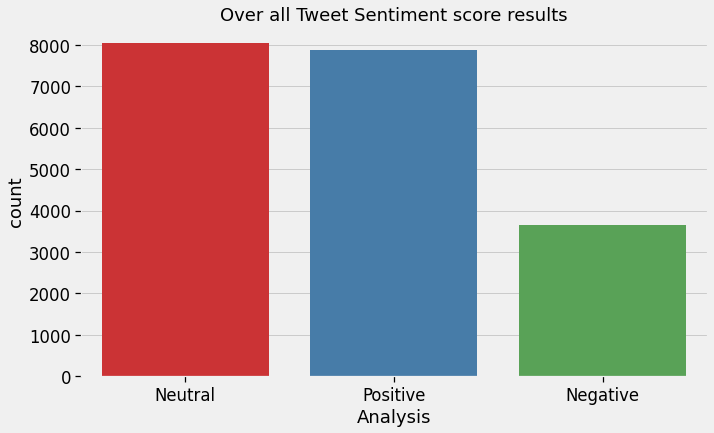

In [ ]:
plt.figure(figsize=(10,6))
sns.set_context(context='notebook',font_scale=1.5)
sns.countplot(df_merged['Analysis'],palette='Set1')
plt.title('Over all Tweet Sentiment score results');

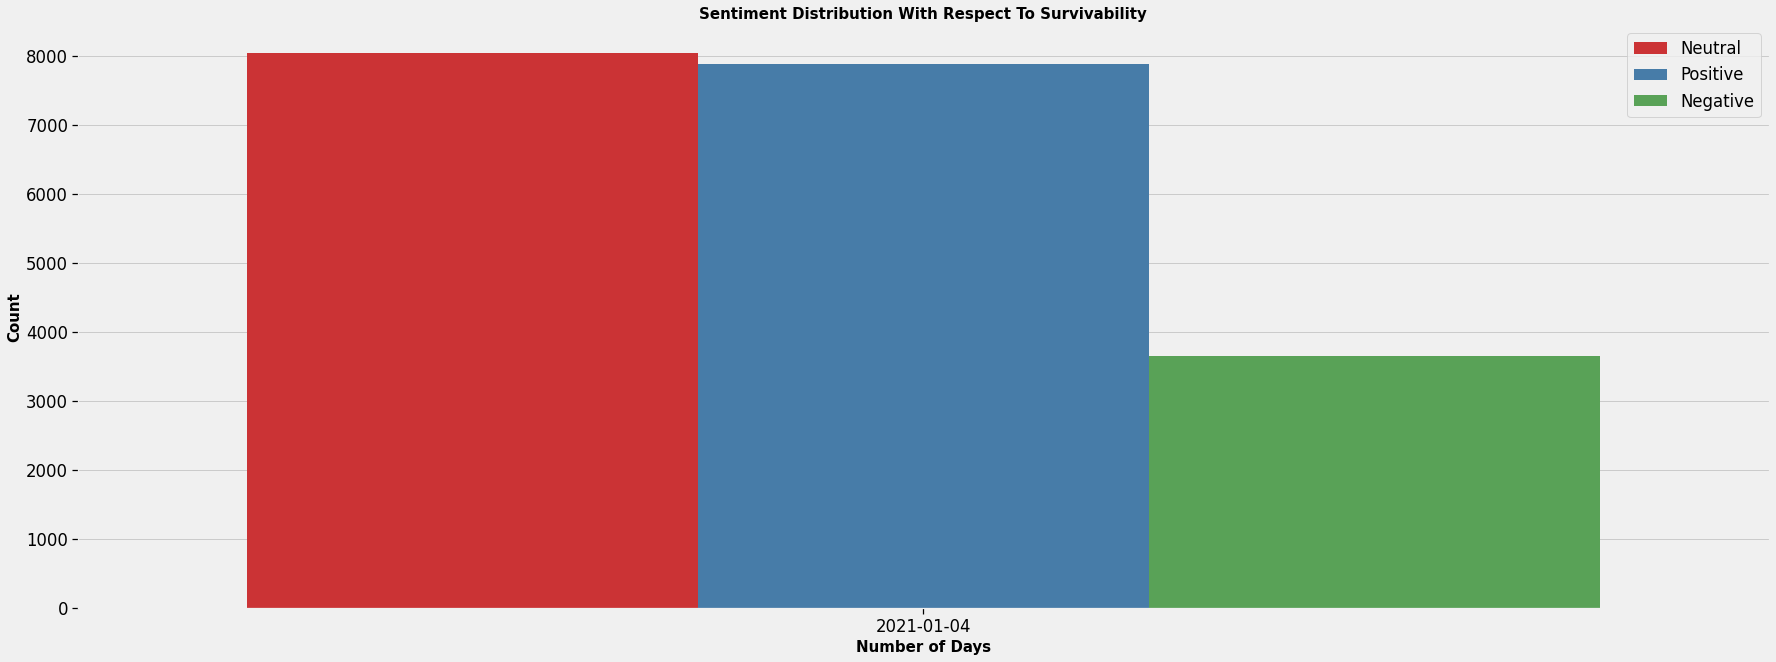

In [ ]:

from seaborn import palettes
import seaborn as sb

plt.figure(figsize=(27,10))
sb.countplot(df_merged['PostingPeriod'], hue=df_merged['Analysis'], palette = 'Set1')
plt.legend(loc='upper right')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xlabel('Number of Days', fontsize=15, fontweight='bold')
plt.title('Sentiment Distribution With Respect To Survivability', fontsize=15, fontweight='bold')
plt.show()

##Applying Silhouetee Score Method

In [ ]:
df_merged.fillna(0,inplace=True)

In [ ]:
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
df_merged['Analysis'] = df_merged['Analysis'].replace(['Positive','Negative', 'Neutral'],['1','-1', '0'])


In [ ]:
df_merged.duplicated().sum()

0

In [ ]:
df_merged.duplicated(subset=['author_id']).sum()

12294

In [ ]:
df_merged

,author_id,followers_count,following_count,listed_count,tweet_count,text,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_TIME,REPEAT_USER,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty,Cleaning_Tweets,Subjectivity,Polarity,Analysis
31107,2.743196e+08,2991,4999,35,19294,@IlhanMN President-elect Joe Biden promised Mo...,2021-01-04,0,0,0,0,2021-01-04,2020-12-26,2020-12-28,2021-01-04,3,Y,8946081,16.006726,5000.000334,8.517393,1.000052,0.693173,President-elect Joe Biden promised Monday in ...,0.000000,0.000000,0
31108,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,32,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435,irl live news livestream stopthesteal LIVE:01...,0.500000,0.136364,1
31109,1.125630e+18,31,256,0,7006,FIGHT NEVER GIVE UP!!!! #StopTheSteal https://...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,3,Y,961,6.869014,257.032258,5.553085,1.000143,0.693219,FIGHT NEVER GIVE UP!!!! StopTheSteal t.co/Oqka...,0.000000,0.000000,0
31110,1.577883e+07,326,948,2,38072,@LindseyGrahamSC time to stand up and #stopthe...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,9,Y,106276,11.573804,949.003067,6.856465,1.000026,0.693160,time to stand up and stopthesteal t.co/VEkIky...,0.000000,0.000000,0
31111,1.308570e+18,1449,248,14,1734,#irl #live #news #livestream #stopthesteal LI...,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,33,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435,irl live news livestream stopthesteal LIVE:01...,0.500000,0.136364,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,6.990230e+17,1063,5000,35,69361,@SenRickScott Rick: WE The People Agree And D...,2020-12-29,0,0,0,0,2020-12-29,2020-12-22,2020-12-28,2021-01-04,19,Y,1129969,13.937702,5001.000941,8.517593,1.000014,0.693154,Rick: WE The People Agree And DEMAND YOU UPH...,0.312500,-0.062500,-1
50915,1.139270e+18,2769,4984,11,31035,Breaking News #StopTheinsanity ~ #TrumpIsNotW...,2020-12-29,1,0,0,0,2020-12-29,2020-12-21,2020-12-21,2021-01-04,25,Y,7667361,15.852483,4985.000361,8.514389,1.000032,0.693163,Breaking News StopTheinsanity ~ TrumpIsNotWel...,0.000000,0.000000,0
50916,2.777102e+09,1151,1503,5,30992,@HernanMejia @MajorPatriot He’s right you know...,2020-12-29,1,0,1,0,2020-12-29,2020-12-26,2020-12-28,2021-01-04,8,Y,1324801,14.096774,1504.000869,7.316549,2.000032,1.098623,He’s right you know! The democrats didn’t ju...,0.289286,0.226190,1
50917,8.233130e+17,4068,4662,3,101639,@mtgreenee @BrendaGanues @realDonaldTrump Hey ...,2020-12-29,0,0,0,0,2020-12-29,2020-12-24,2020-12-28,2021-01-04,14,Y,16548624,16.621814,4663.000246,8.447629,1.000010,0.693152,Hey you RINO . Get on board or get out. N...,0.000000,0.000000,0


In [ ]:
#cluster_data.info()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing

'''
X_features_rec_mon = cluster_data[["Influence", "sociability", "favorabilty"]]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X = X_rec_mon

range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

'''

'\nX_features_rec_mon = cluster_data[["Influence", "sociability", "favorabilty"]]\nscaler_rec_mon=preprocessing.StandardScaler()\nX_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)\nX = X_rec_mon\n\nrange_n_clusters = [2,3,4,5,6,7,8]\n\nfor n_clusters in range_n_clusters:\n    clusterer = KMeans(n_clusters=n_clusters)\n    preds = clusterer.fit_predict(X)\n    centers = clusterer.cluster_centers_\n\n    score = silhouette_score(X, preds)\n    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))\n\n'

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


'''
range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=250, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


'''

'\nrange_n_clusters = [2,3,4,5,6,7,8]\n\nfor n_clusters in range_n_clusters:\n    # Create a subplot with 1 row and 2 columns\n    fig, (ax1, ax2) = plt.subplots(1, 2)\n    fig.set_size_inches(18, 7)\n\n    # The 1st subplot is the silhouette plot\n    # The silhouette coefficient can range from -1, 1 but in this example all\n    # lie within [-0.1, 1]\n    ax1.set_xlim([-0.1, 1])\n    # The (n_clusters+1)*10 is for inserting blank space between silhouette\n    # plots of individual clusters, to demarcate them clearly.\n    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])\n\n    # Initialize the clusterer with n_clusters value and a random generator\n    # seed of 10 for reproducibility.\n    clusterer = KMeans(n_clusters=n_clusters, random_state=10)\n    cluster_labels = clusterer.fit_predict(X)\n\n    # The silhouette_score gives the average value for all the samples.\n    # This gives a perspective into the density and separation of the formed\n    # clusters\n    silhouette_avg = 

In [ ]:
'''

from IPython.core.pylabtools import figsize
# Data Distribution 

cols = cluster_data.select_dtypes(exclude='object').columns.tolist()
fig, ax = plt.subplots(nrows= 3, ncols=3, figsize=(12,8), constrained_layout=True)
ax = ax.flatten()
plt.suptitle("Data Distribution")
for x, i in enumerate(cols):
  sns.histplot(x=cluster_data[i], ax=ax[x], kde=True, color=['#F8D030'])

  '''

'\n\nfrom IPython.core.pylabtools import figsize\n# Data Distribution \n\ncols = cluster_data.select_dtypes(exclude=\'object\').columns.tolist()\nfig, ax = plt.subplots(nrows= 3, ncols=3, figsize=(12,8), constrained_layout=True)\nax = ax.flatten()\nplt.suptitle("Data Distribution")\nfor x, i in enumerate(cols):\n  sns.histplot(x=cluster_data[i], ax=ax[x], kde=True, color=[\'#F8D030\'])\n\n  '

In [ ]:
'''

cols = cluster_data.select_dtypes(exclude='object').columns.tolist()

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(12,8), constrained_layout=True)
ax = ax.flatten()
plt.suptitle("Box-Plot")
for x, i in enumerate(cols):
    sns.boxplot(x=cluster_data[i], ax=ax[x], palette=['#705898'])

'''

'\n\ncols = cluster_data.select_dtypes(exclude=\'object\').columns.tolist()\n\nfig, ax = plt.subplots(nrows=3,ncols=3, figsize=(12,8), constrained_layout=True)\nax = ax.flatten()\nplt.suptitle("Box-Plot")\nfor x, i in enumerate(cols):\n    sns.boxplot(x=cluster_data[i], ax=ax[x], palette=[\'#705898\'])\n\n'

#K Mean Clustering

Applying Elbow Method

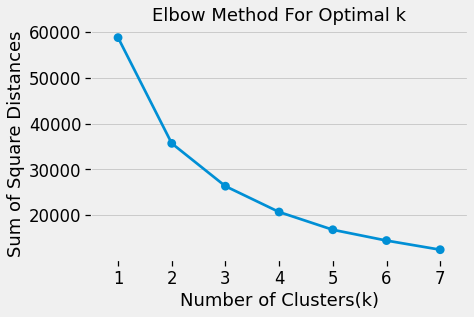

In [ ]:
X_features_rec_mon=df_merged[["Influence", "sociability", "Analysis"]]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X = X_rec_mon
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,8):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 100)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
del df_merged['text']
del df_merged['Cleaning_Tweets']

In [ ]:
#droppig na if any
df_merged = df_merged.dropna(how = 'any')
df_merged.head(5)
df_merged.fillna(0)
df_merged.fillna(0,inplace=True)
df_merged.fillna(0,inplace=True)
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)
df_merged.replace(np.nan, 0)

'''


#### KMEANS  ########
k3 = KMeans(n_clusters=3, random_state=10)

k3.fit(cluster_data)
df_merged['cluster'] = k3.labels_
df_merged

'''

"\n\n\n#### KMEANS  ########\nk3 = KMeans(n_clusters=3, random_state=10)\n\nk3.fit(cluster_data)\ndf_merged['cluster'] = k3.labels_\ndf_merged\n\n"

In [ ]:
'''
plt.figure(figsize=(25,10))
cluster_data['author_id'].value_counts().plot.bar()
plt.title('Number of complaint types by state')
plt.xlabel('State')
plt.ylabel('Number of complaints')
plt.show()

'''

"\nplt.figure(figsize=(25,10))\ncluster_data['author_id'].value_counts().plot.bar()\nplt.title('Number of complaint types by state')\nplt.xlabel('State')\nplt.ylabel('Number of complaints')\nplt.show()\n\n"

In [ ]:
#user_by_cluster = cluster_data.groupby(['author_id','cluster', 'Analysis']).size().unstack().fillna(0)
#user_by_cluster

In [ ]:
'''

plt.figure(figsize=(25,10))
cluster_data['cluster'].value_counts().plot.bar()
plt.title('Number of users by cluster')
plt.xlabel('cluster')
plt.ylabel('Number of clusters')
plt.show()

'''

"\n\nplt.figure(figsize=(25,10))\ncluster_data['cluster'].value_counts().plot.bar()\nplt.title('Number of users by cluster')\nplt.xlabel('cluster')\nplt.ylabel('Number of clusters')\nplt.show()\n\n"

In [ ]:
'''

plt.figure(figsize=(25,10))
cluster_data['Analysis'].value_counts().plot.bar()
plt.title('Number of users by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of users')
plt.show()

'''

"\n\nplt.figure(figsize=(25,10))\ncluster_data['Analysis'].value_counts().plot.bar()\nplt.title('Number of users by Sentiment')\nplt.xlabel('Sentiment')\nplt.ylabel('Number of users')\nplt.show()\n\n"

In [ ]:
#Centroid finding and plotting
#centers = k3.cluster_centers_
#centers

In [ ]:
#centroidX = centers[:,0]
#centroidX

In [ ]:
#centroidY = centers[:,1]
#centroidY

In [ ]:
import seaborn as sns
from plotly.colors import n_colors
import plotly.express as px

In [ ]:
print(df_merged.columns.tolist())

['author_id', 'followers_count', 'following_count', 'listed_count', 'tweet_count', 'created_at', 'retweet_count', 'reply_count', 'like_count', 'quote_count', 'created_at_month', 'cohort', 'CohortGroup', 'PostingPeriod', 'REPEAT_TIME', 'REPEAT_USER', 'folws_stat_foloing_rt', 'Influence', 'followee_followers_rt', 'sociability', 'likes_tweets_rt', 'favorabilty', 'Subjectivity', 'Polarity', 'Analysis']


In [ ]:
#non_numeric_columns = list(set(df_merged.columns)-set(df_merged._get_numeric_data().columns))
#df_merged[non_numeric_columns] = df_merged[non_numeric_columns].apply(lambda x : str(x).strip())

In [ ]:
df2 = df_merged[df_merged.columns.difference(['created_at', 'created_at_dt', 'PostingPeriod', 'cohort', 'REPEAT_USER_PROSPECTIVE', 'dayOfWeek', 'CohortGroup', 'REPEAT_USER', 'created_at_month'])]

In [ ]:
df_merged.dropna(how='any', inplace=True)

In [ ]:
inertia_list = []
for n_clusters in range(1,21):
    model = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 0)
    model.fit(df2)
    inertia_list.append(model.inertia_)

In [ ]:
#plt.figure(figsize = (20, 10))
#plt.plot(range(1, 21),inertia_list)
#plt.xlabel('Cluster numbers')
#plt.ylabel('Inertia values')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19583 entries, 31107 to 50918
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Analysis               19583 non-null  object 
 1   Influence              19583 non-null  float64
 2   Polarity               19583 non-null  float64
 3   REPEAT_TIME            19583 non-null  int64  
 4   Subjectivity           19583 non-null  float64
 5   author_id              19583 non-null  float64
 6   favorabilty            19583 non-null  float64
 7   followee_followers_rt  19583 non-null  float64
 8   followers_count        19583 non-null  int64  
 9   following_count        19583 non-null  int64  
 10  folws_stat_foloing_rt  19583 non-null  int64  
 11  like_count             19583 non-null  int64  
 12  likes_tweets_rt        19583 non-null  float64
 13  listed_count           19583 non-null  int64  
 14  quote_count            19583 non-null  int64  
 15

In [ ]:
df2['Analysis'] = pd.to_numeric(df2['Analysis'],errors= 'coerce')

In [ ]:
#df2.describe()

In [ ]:
#df2

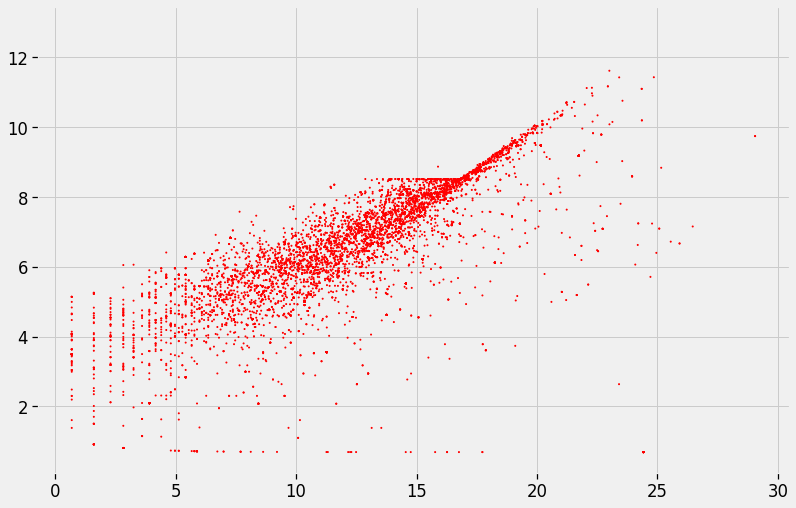

In [ ]:
fig = plt.figure(figsize = (12, 8))
plt.scatter( df2.Influence, df2.sociability, df2.Analysis, color = 'red')

<Figure size 864x576 with 0 Axes>

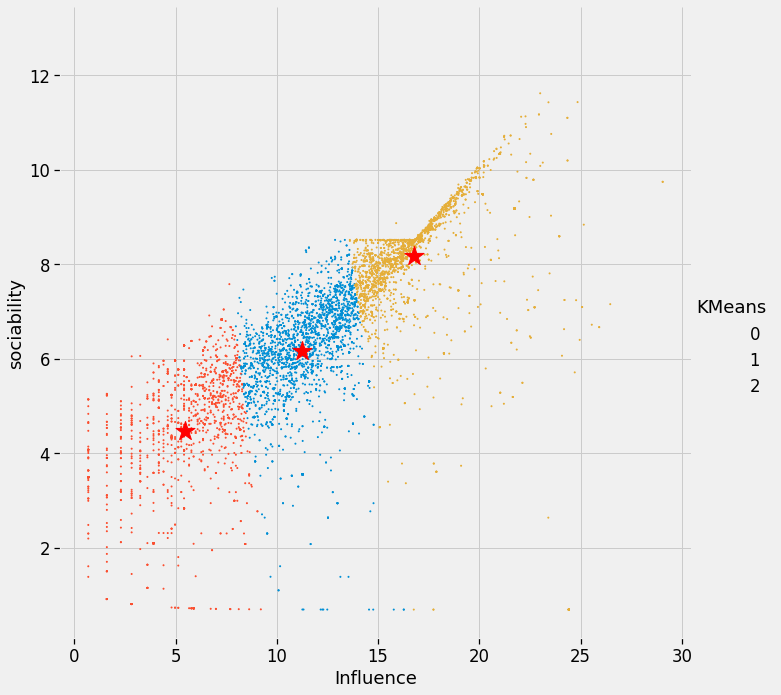

In [ ]:
fig = plt.figure(figsize = (12, 8))
my_data = np.column_stack((df2.Influence, df2.sociability, df2.Analysis))

km_model = KMeans(n_clusters = 3).fit(my_data)
my_clusters = km_model.cluster_centers_

# Put assigned labels to the original dataset..
df2['KMeans'] = km_model.labels_
p = sns.FacetGrid(data = df2, hue = 'KMeans', height = 10)
p.map(plt.scatter, 'Influence', 'sociability', 'Analysis')
p.add_legend()
plt.scatter(my_clusters[:, 0], my_clusters[:, 1], s = 400, marker = '*', c = 'r')

In [ ]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans, SpectralClustering

In [ ]:
#km_model.cluster_centers_

In [ ]:
df2['KMeans'] = km_model.labels_
df2.groupby('KMeans').describe()

Analysis                                              Influence  \
          count      mean       std  min  25%  50%  75%  max     count   
KMeans                                                                   
0        8557.0  0.253477  0.720955 -1.0  0.0  0.0  1.0  1.0    8557.0   
1        3971.0  0.195417  0.736312 -1.0  0.0  0.0  1.0  1.0    3971.0   
2        7055.0  0.180439  0.753717 -1.0  0.0  0.0  1.0  1.0    7055.0   

                                                                         \
             mean       std        min        25%        50%        75%   
KMeans                                                                    
0       11.249832  1.561008   7.978311  10.150387  11.167007  12.663007   
1        5.464188  2.118561   0.693147   4.174387   5.891644   7.222566   
2       16.776425  2.264542  13.604791  15.082305  16.291099  17.778341   

                  Polarity                                                    \
              max    count      mean       std  min  25%  50%       75%  max   
KMeans                                                                         
0       16.267762   8557.0  0.091634  0.284738 -1.0  0.0  0.0  0.285714  1.0   
1        9.382780   3971.0  0.082032  0.309862 -1.0  0.0  0.0  0.200000  1.0   
2       29.049830   7055.0  0.072087  0.299634 -1.0  0.0  0.0  0.200477  1.0   

       REPEAT_TIME                                                     \
             count       mean         std  min  25%  50%   75%    max   
KMeans                                                                  
0           8557.0  74.897277  180.530099  1.0  2.0  5.0  29.0  966.0   
1           3971.0  13.803072   22.748067  1.0  1.0  4.0  14.0  126.0   
2           7055.0  28.124876   54.299298  1.0  2.0  6.0  24.0  348.0   

       Subjectivity                                                         \
              count      mean       std  min  25%       50%       75%  max   
KMeans                                                                       
0            8557.0  0.345516  0.309628  0.0  0.0  0.375000  0.541667  1.0   
1            3971.0  0.345497  0.323542  0.0  0.0  0.350000  0.561806  1.0   
2            7055.0  0.339692  0.315519  0.0  0.0  0.333333  0.583333  1.0   

       author_id                                                        \
           count          mean           std         min           25%   
KMeans                                                                   
0         8557.0  4.195012e+17  5.489929e+17   1447861.0  2.070725e+08   
1         3971.0  8.260099e+17  5.487618e+17  12214652.0  2.946504e+09   
2         7055.0  2.641110e+17  4.509614e+17    784331.0  4.473431e+07   

                                                 favorabilty            \
                 50%           75%           max       count      mean   
KMeans                                                                   
0       1.340637e+09  1.005880e+18  1.346180e+18      8557.0  0.848636   
1       1.096450e+18  1.301750e+18  1.346190e+18      3971.0  0.775767   
2       5.421249e+08  7.113500e+17  1.344300e+18      7055.0  1.202279   

                                                                     \
             std       min       25%       50%       75%        max   
KMeans                                                                
0       0.375428  0.693148  0.693172  0.693210  0.694043   6.208591   
1       0.230259  0.693150  0.693302  0.693623  0.695309   3.951254   
2       1.029056  0.693147  0.693157  0.693211  1.098688  10.594733   

       followee_followers_rt                                       \
                       count         mean           std       min   
KMeans                                                              
0                     8557.0   702.190979    611.297819  1.000293   
1                     3971.0   166.015336    177.448713  1.009174   
2                     7055.0  5923.662150  10156.552409  1.0

In [ ]:
dt_kmeans = df2.copy()
dt_kmeans["author_id"] = df2["author_id"]
#dt_kmeans["Kmeans"] = km_model.labels_
dt_kmeans.head()

,Analysis,Influence,Polarity,REPEAT_TIME,Subjectivity,author_id,favorabilty,followee_followers_rt,followers_count,following_count,folws_stat_foloing_rt,like_count,likes_tweets_rt,listed_count,quote_count,reply_count,retweet_count,sociability,tweet_count,KMeans
31107,0,16.006726,0.000000,3,0.0,2.743196e+08,0.693173,5000.000334,2991,4999,8946081,0,1.000052,35,0,0,0,8.517393,19294,2
31108,1,14.557258,0.136364,32,0.5,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,0
31109,0,6.869014,0.000000,3,0.0,1.125630e+18,0.693219,257.032258,31,256,961,0,1.000143,0,0,0,0,5.553085,7006,1
31110,0,11.573804,0.000000,9,0.0,1.577883e+07,0.693160,949.003067,326,948,106276,0,1.000026,2,0,0,0,6.856465,38072,0
31111,1,14.557258,0.136364,33,0.5,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,0


In [ ]:
'''

p = sns.FacetGrid(data = cluster_data, height = 10)
p.map(plt.scatter, 'Influence', 'sociability', 'favorabilty',)
p.add_legend()
plt.title('Data With Labels')
p = sns.FacetGrid(data = cluster_data, hue = 'KMeans', height = 10)
p.map(plt.scatter, 'Influence', 'sociability', 'favorabilty')
p.add_legend()
plt.title('K-Means Result')
'''


"\n\np = sns.FacetGrid(data = cluster_data, height = 10)\np.map(plt.scatter, 'Influence', 'sociability', 'favorabilty',)\np.add_legend()\nplt.title('Data With Labels')\np = sns.FacetGrid(data = cluster_data, hue = 'KMeans', height = 10)\np.map(plt.scatter, 'Influence', 'sociability', 'favorabilty')\np.add_legend()\nplt.title('K-Means Result')\n"

In [ ]:
dt_kmeans = df2.copy()

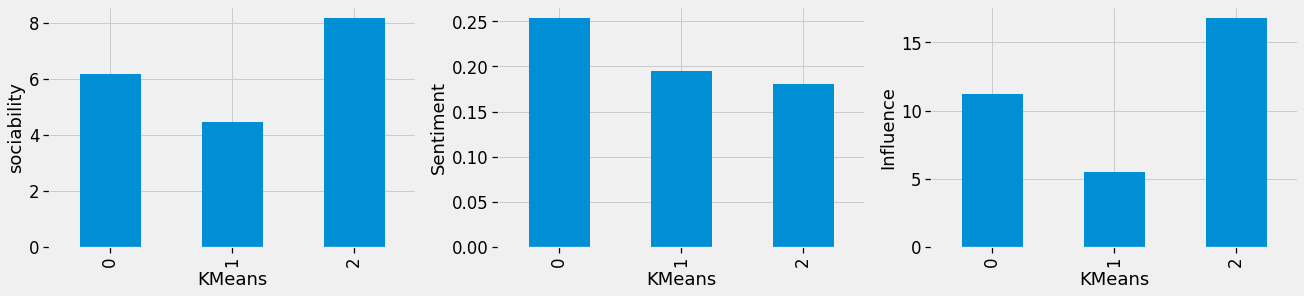

In [ ]:
cols = ["sociability", "Analysis", "Influence"]

fig, ax = plt.subplots(ncols=3, figsize=(18,4), constrained_layout=True)

dt_kmeans.groupby(['KMeans']).mean()["sociability"].T.plot(kind='bar', ax=ax[0], xlabel="KMeans", ylabel="sociability")
dt_kmeans.groupby(['KMeans']).mean()["Analysis"].T.plot(kind='bar', ax=ax[1], xlabel="KMeans", ylabel="Sentiment")
dt_kmeans.groupby(['KMeans']).mean()["Influence"].T.plot(kind='bar', ax=ax[2], xlabel="KMeans", ylabel="Influence")
#dt_kmeans.groupby(['KMeans']).mean()["activiness"].T.plot(kind='bar', ax=ax[3], xlabel="KMeans", ylabel="activiness")
#dt_kmeans.groupby(['KMeans']).mean()["survivability"].T.plot(kind='bar', ax=ax[4], xlabel="KMeans", ylabel="survivability")

#dt_kmeans.groupby(['clusters']).mean()["followers_count"].T.plot(kind='bar', ax=ax[5], xlabel="clusters", ylabel="followers_count")
#dt_kmeans.groupby(['clusters']).mean()["hashtags_end"].T.plot(kind='bar', ax=ax[6], xlabel="clusters", ylabel="hashtags_end")
plt.show()

Based on sentiment can see that users in cluster 0 are most influenced by sentiment. 



In [ ]:
dt_kmeans["KMeans"] = dt_kmeans["KMeans"].map({0: "users with reach", 1: 'brokers of social movement', 2: 'hostile'})

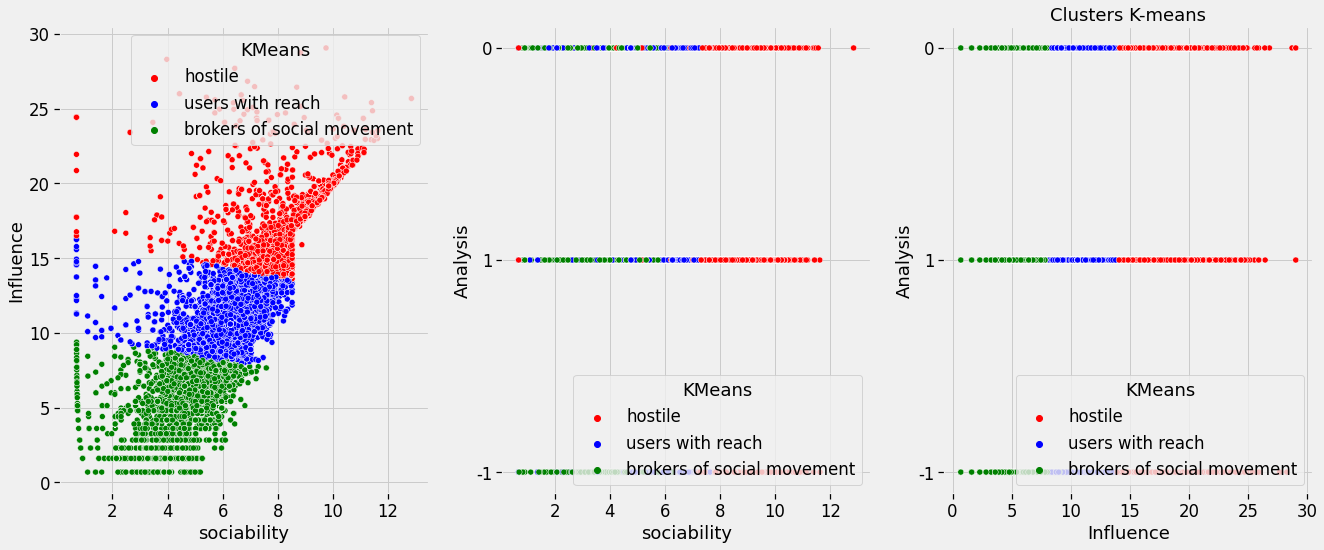

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
sns.scatterplot(data=df_merged, x='sociability', y='Influence', hue=dt_kmeans["KMeans"], ax=ax[0], palette=["red", "blue", "green"])
sns.scatterplot(data=df_merged, x='sociability', y='Analysis', hue=dt_kmeans["KMeans"], ax=ax[1], palette=["red", "blue", "green"])
sns.scatterplot(data=df_merged, x='Influence', y='Analysis', hue=dt_kmeans["KMeans"], ax=ax[2], palette=["red", "blue", "green"])
plt.title("Clusters K-means")
plt.show()

In [ ]:
'''

from seaborn import palettes
import seaborn as sb

plt.figure(figsize=(17,10))
sb.countplot(dt_kmeans['cohort'], hue=dt_kmeans['KMeans'], palette = 'Set1')
plt.legend(loc='upper right')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xlabel('Number of Days', fontsize=15, fontweight='bold')
plt.title('Clusters Distribution With Respect cohort', fontsize=15, fontweight='bold')
plt.show()
'''

"\n\nfrom seaborn import palettes\nimport seaborn as sb\n\nplt.figure(figsize=(17,10))\nsb.countplot(dt_kmeans['cohort'], hue=dt_kmeans['KMeans'], palette = 'Set1')\nplt.legend(loc='upper right')\nplt.ylabel('Count', fontsize=15, fontweight='bold')\nplt.xlabel('Number of Days', fontsize=15, fontweight='bold')\nplt.title('Clusters Distribution With Respect cohort', fontsize=15, fontweight='bold')\nplt.show()\n"

**Categorical Data**

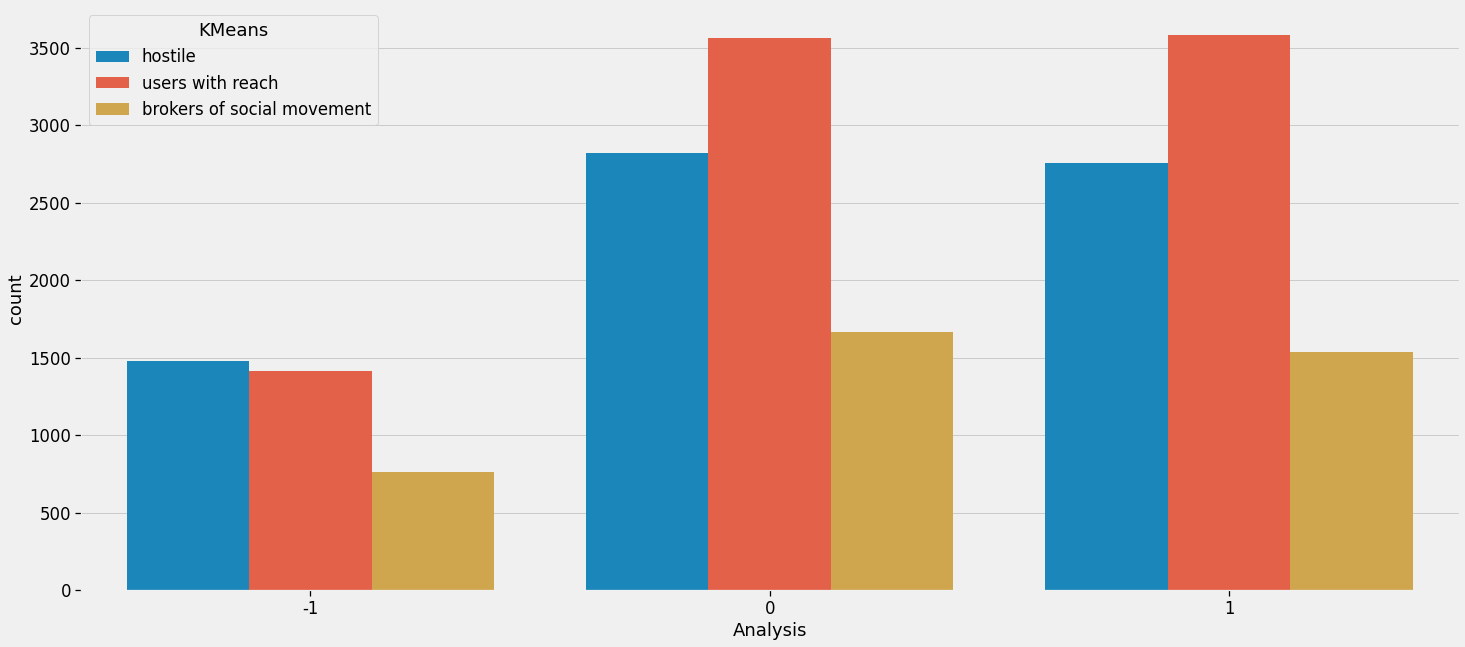

In [ ]:
plt.figure(figsize=(22,10))
sns.countplot(x='Analysis', hue = 'KMeans',data = dt_kmeans)

In [ ]:
dt_kmeans

,Analysis,Influence,Polarity,REPEAT_TIME,Subjectivity,author_id,favorabilty,followee_followers_rt,followers_count,following_count,folws_stat_foloing_rt,like_count,likes_tweets_rt,listed_count,quote_count,reply_count,retweet_count,sociability,tweet_count,KMeans
31107,0,16.006726,0.000000,3,0.000000,2.743196e+08,0.693173,5000.000334,2991,4999,8946081,0,1.000052,35,0,0,0,8.517393,19294,hostile
31108,1,14.557258,0.136364,32,0.500000,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,users with reach
31109,0,6.869014,0.000000,3,0.000000,1.125630e+18,0.693219,257.032258,31,256,961,0,1.000143,0,0,0,0,5.553085,7006,brokers of social movement
31110,0,11.573804,0.000000,9,0.000000,1.577883e+07,0.693160,949.003067,326,948,106276,0,1.000026,2,0,0,0,6.856465,38072,users with reach
31111,1,14.557258,0.136364,33,0.500000,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,users with reach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,-1,13.937702,-0.062500,19,0.312500,6.990230e+17,0.693154,5001.000941,1063,5000,1129969,0,1.000014,35,0,0,0,8.517593,69361,hostile
50915,0,15.852483,0.000000,25,0.000000,1.139270e+18,0.693163,4985.000361,2769,4984,7667361,0,1.000032,11,0,0,1,8.514389,31035,hostile
50916,1,14.096774,0.226190,8,0.289286,2.777102e+09,1.098623,1504.000869,1151,1503,1324801,1,2.000032,5,0,0,1,7.316549,30992,hostile
50917,0,16.621814,0.000000,14,0.000000,8.233130e+17,0.693152,4663.000246,4068,4662,16548624,0,1.000010,3,0,0,0,8.447629,101639,hostile


**Continious Data**

In [ ]:
#plt.figure(figsize=(27,10))
#sns.boxplot(y='Polarity',x = 'cohort', hue = 'KMeans',data = dt_kmeans)
#sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = dt_kmeans , ax=axarr[0][1])

# Sentiment Polarity

In [ ]:
authors_clustered = df2.copy(deep=True)
authors_clustered.head()

,Analysis,Influence,Polarity,REPEAT_TIME,Subjectivity,author_id,favorabilty,followee_followers_rt,followers_count,following_count,folws_stat_foloing_rt,like_count,likes_tweets_rt,listed_count,quote_count,reply_count,retweet_count,sociability,tweet_count,KMeans
31107,0,16.006726,0.000000,3,0.0,2.743196e+08,0.693173,5000.000334,2991,4999,8946081,0,1.000052,35,0,0,0,8.517393,19294,2
31108,1,14.557258,0.136364,32,0.5,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,0
31109,0,6.869014,0.000000,3,0.0,1.125630e+18,0.693219,257.032258,31,256,961,0,1.000143,0,0,0,0,5.553085,7006,1
31110,0,11.573804,0.000000,9,0.0,1.577883e+07,0.693160,949.003067,326,948,106276,0,1.000026,2,0,0,0,6.856465,38072,0
31111,1,14.557258,0.136364,33,0.5,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,0


In [ ]:
# conversion of sentiment into negative / positive / neutral based on the score
authors_clustered["Analysis"] = authors_clustered["Polarity"].apply(lambda x : "negative" if x < -0.5 else "positive" if x > 0.5 else "neutral")

# display the first 10 lines of the dataframe


authors_clustered[["author_id", "KMeans", "Polarity","Analysis", ]].head(10)

,author_id,KMeans,Polarity,Analysis
31107,2.743196e+08,2,0.000000,neutral
31108,1.308570e+18,0,0.136364,neutral
31109,1.125630e+18,1,0.000000,neutral
31110,1.577883e+07,0,0.000000,neutral
31111,1.308570e+18,0,0.136364,neutral
31112,4.947951e+08,1,-0.125000,neutral
31113,1.225200e+18,0,0.000000,neutral
31114,5.715196e+07,0,0.136364,neutral
31115,1.402986e+08,1,0.000000,neutral
31116,1.171970e+18,2,0.136364,neutral


In [ ]:
polarity_intra_cluster = authors_clustered.groupby(["KMeans","Analysis"]).count()["author_id"].unstack(fill_value=0)

In [ ]:
polarity_intra_cluster.head()

Analysis,negative,neutral,positive
KMeans,,,
0,185,7793,579
1,101,3522,348
2,181,6380,494


Normalization

In [ ]:
polarity_intra_cluster["cluster_size"] = authors_clustered.groupby("KMeans").size() #Number of users for each cluster

In [ ]:
polarity_intra_cluster.head()

Analysis,negative,neutral,positive,cluster_size
KMeans,,,,
0,185,7793,579,8557
1,101,3522,348,3971
2,181,6380,494,7055


In [ ]:
polarity_intra_cluster["positive"] = polarity_intra_cluster["positive"] / polarity_intra_cluster["cluster_size"] *100
polarity_intra_cluster["neutral"] = polarity_intra_cluster["neutral"] / polarity_intra_cluster["cluster_size"] *100
polarity_intra_cluster["negative"] = polarity_intra_cluster["negative"] / polarity_intra_cluster["cluster_size"] *100

In [ ]:
polarity_intra_cluster = polarity_intra_cluster.round().astype("int")
polarity_intra_cluster.head()

Analysis,negative,neutral,positive,cluster_size
KMeans,,,,
0,2,91,7,8557
1,3,89,9,3971
2,3,90,7,7055


In [ ]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

In [ ]:
# Plot a box-whisker chart
#import matplotlib.pyplot as plt
#polarity_intra_cluster['positive'].plot(kind='box', title='Positive Sentiment', figsize=(10,8))

#plt.show()

In [ ]:
# Plot a box-whisker chart
#import matplotlib.pyplot as plt
#polarity_intra_cluster['negative'].plot(kind='box', title='Negative Sentiment', figsize=(10,8))

#plt.show()

x = time
y= measure sentiment value

perhaps stack charts 
color code based on clusters - perhaps take a user of each cluster and then plot. 

In [ ]:
'''
from seaborn import palettes
import seaborn as sb

plt.figure(figsize=(17,10))
sb.countplot(cluster_data['survivability'], hue=df2['KMeans'], palette = 'Set1')
plt.legend(loc='upper right')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xlabel('Number of Days', fontsize=15, fontweight='bold')
plt.title('Cluster Distribution With Respect To Survivability', fontsize=15, fontweight='bold')
plt.show()
'''

"\nfrom seaborn import palettes\nimport seaborn as sb\n\nplt.figure(figsize=(17,10))\nsb.countplot(cluster_data['survivability'], hue=df2['KMeans'], palette = 'Set1')\nplt.legend(loc='upper right')\nplt.ylabel('Count', fontsize=15, fontweight='bold')\nplt.xlabel('Number of Days', fontsize=15, fontweight='bold')\nplt.title('Cluster Distribution With Respect To Survivability', fontsize=15, fontweight='bold')\nplt.show()\n"

# Visaulization of Sentiment Distribution within Clusters

In [ ]:
init_index = 631
data_dict_viz1 = dict()
for id, row in polarity_intra_cluster.loc[:8].iterrows():
  data = row[["negative", "positive", "neutral"]].to_dict()
  data_dict_viz1[init_index] = {
            'values': data,
            'title': {'label': f'Sentiment distribution % within cluster {id}', 'loc': 'left'},
            'labels': [f"{k} ({v}%)" for k, v in data.items()]
          }
  init_index += 1

In [ ]:
init_index = 631
data_dict_viz2 = dict()
for id, row in polarity_intra_cluster.loc[9:17].iterrows():
  data = row[["negative", "positive", "neutral"]].to_dict()
  data_dict_viz2[init_index] = {
            'values': data,
            'title': {'label': f'Sentiment distribution % within cluster {id}', 'loc': 'left'},
            'labels': [f"{k} ({v}%)" for k, v in data.items()]
          }
  init_index += 1

In [ ]:
pip install pywaffle

     |████████████████████████████████| 565 kB 5.1 MB/s 


In [ ]:
from pywaffle import Waffle

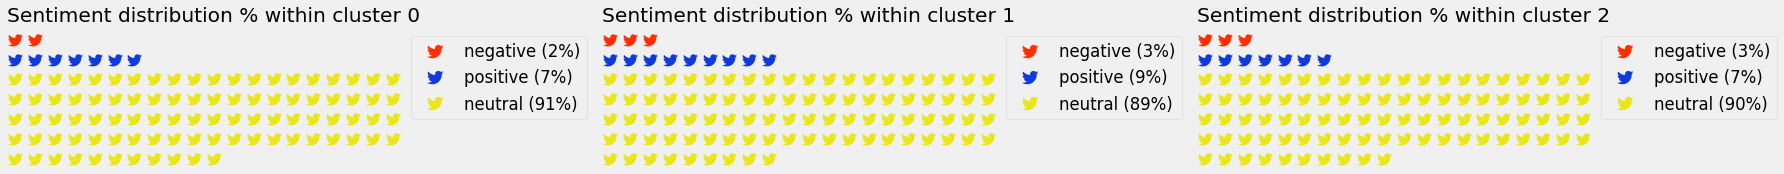

<Waffle size 1224x1080 with 0 Axes>

In [ ]:
fig1 = plt.figure(
    FigureClass = Waffle, 
    plots = data_dict_viz1,
    columns = 20,
    vertical = True,
    starting_location = "NW",
    interval_ratio_x = 0.1,
    interval_ratio_y = 0.1, 
    colors=("#ff2f03", "#103ae0", "#e9e61c"),  # shared parameter among subplots
    icons= 'twitter', #twitter-square',
    icon_style = "brands",
    icon_size=15, 
    icon_legend=True,
    legend = {'loc': 'upper left',
              'bbox_to_anchor': (1, 1)},
    block_arranging_style='new-line',
    figsize=(25, 20)
)

fig2 = plt.figure(
    FigureClass = Waffle, 
    plots = data_dict_viz2,
    columns = 20,
    vertical = True,
    starting_location = "NW",
    interval_ratio_x = 0.1,
    interval_ratio_y = 0.1, 
    colors=("#ff2f03", "#103ae0", "#e9e61c"),  # shared parameter among subplots
    icons= 'twitter', #twitter-square',
    icon_style = "brands",
    icon_size=15, 
    icon_legend=True,
    legend = {'loc': 'upper left',
              'bbox_to_anchor': (1, 1)},
    block_arranging_style='new-line',
    figsize=(17, 15)
)

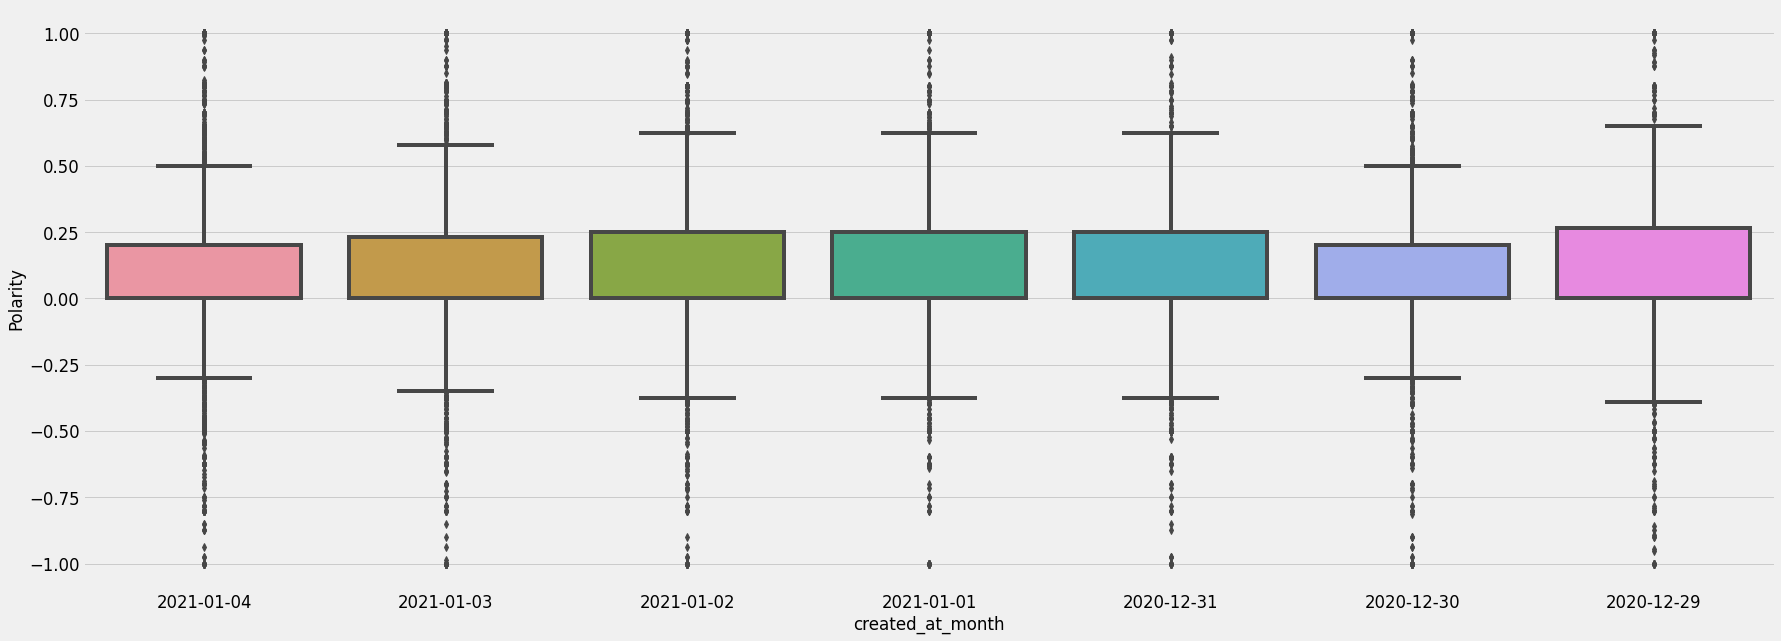

In [ ]:
plt.figure(figsize=(27,10))
sns.boxplot(x='created_at_month',y='Polarity', data=df_merged)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas.plotting import parallel_coordinates
from matplotlib.colors import ListedColormap

In [ ]:
print(df_merged.columns.tolist())

['author_id', 'followers_count', 'following_count', 'listed_count', 'tweet_count', 'created_at', 'retweet_count', 'reply_count', 'like_count', 'quote_count', 'created_at_month', 'cohort', 'CohortGroup', 'PostingPeriod', 'REPEAT_TIME', 'REPEAT_USER', 'folws_stat_foloing_rt', 'Influence', 'followee_followers_rt', 'sociability', 'likes_tweets_rt', 'favorabilty', 'Subjectivity', 'Polarity', 'Analysis']


In [ ]:
new_df = pd.concat([df2, df_merged], axis=1, join='inner')
display(new_df)

,Analysis,Influence,Polarity,REPEAT_TIME,Subjectivity,author_id,favorabilty,followee_followers_rt,followers_count,following_count,folws_stat_foloing_rt,like_count,likes_tweets_rt,listed_count,quote_count,reply_count,retweet_count,sociability,tweet_count,KMeans,author_id,followers_count,following_count,listed_count,tweet_count,created_at,retweet_count,reply_count,like_count,quote_count,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_TIME,REPEAT_USER,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty,Subjectivity,Polarity,Analysis
31107,0,16.006726,0.000000,3,0.000000,2.743196e+08,0.693173,5000.000334,2991,4999,8946081,0,1.000052,35,0,0,0,8.517393,19294,2,2.743196e+08,2991,4999,35,19294,2021-01-04,0,0,0,0,2021-01-04,2020-12-26,2020-12-28,2021-01-04,3,Y,8946081,16.006726,5000.000334,8.517393,1.000052,0.693173,0.000000,0.000000,0
31108,1,14.557258,0.136364,32,0.500000,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,0,1.308570e+18,1449,248,14,1734,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,32,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435,0.500000,0.136364,1
31109,0,6.869014,0.000000,3,0.000000,1.125630e+18,0.693219,257.032258,31,256,961,0,1.000143,0,0,0,0,5.553085,7006,1,1.125630e+18,31,256,0,7006,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,3,Y,961,6.869014,257.032258,5.553085,1.000143,0.693219,0.000000,0.000000,0
31110,0,11.573804,0.000000,9,0.000000,1.577883e+07,0.693160,949.003067,326,948,106276,0,1.000026,2,0,0,0,6.856465,38072,0,1.577883e+07,326,948,2,38072,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,9,Y,106276,11.573804,949.003067,6.856465,1.000026,0.693160,0.000000,0.000000,0
31111,1,14.557258,0.136364,33,0.500000,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,0,1.308570e+18,1449,248,14,1734,2021-01-04,0,0,0,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,33,Y,2099601,14.557258,249.000690,5.521464,1.000577,0.693435,0.500000,0.136364,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,-1,13.937702,-0.062500,19,0.312500,6.990230e+17,0.693154,5001.000941,1063,5000,1129969,0,1.000014,35,0,0,0,8.517593,69361,2,6.990230e+17,1063,5000,35,69361,2020-12-29,0,0,0,0,2020-12-29,2020-12-22,2020-12-28,2021-01-04,19,Y,1129969,13.937702,5001.000941,8.517593,1.000014,0.693154,0.312500,-0.062500,-1
50915,0,15.852483,0.000000,25,0.000000,1.139270e+18,0.693163,4985.000361,2769,4984,7667361,0,1.000032,11,0,0,1,8.514389,31035,2,1.139270e+18,2769,4984,11,31035,2020-12-29,1,0,0,0,2020-12-29,2020-12-21,2020-12-21,2021-01-04,25,Y,7667361,15.852483,4985.000361,8.514389,1.000032,0.693163,0.000000,0.000000,0
50916,1,14.096774,0.226190,8,0.289286,2.777102e+09,1.098623,1504.000869,1151,1503,1324801,1,2.000032,5,0,0,1,7.316549,30992,2,2.777102e+09,1151,1503,5,30992,2020-12-29,1,0,1,0,2020-12-29,2020-12-26,2020-12-28,2021-01-04,8,Y,1324801,14.096774,1504.000869,7.316549,2.000032,1.098623,0.289286,0.226190,1
50917,0,16.621814,0.000000,14,0.000000,8.233130e+17,0.693152,4663.000246,4068,4662,16548624,0,1.000010,3,0,0,0,8.447629,101639,2,8.233130e+17,4068,4662,3,101639,2020-12-29,0,0,0,0,2020-12-29,2020-12-24,2020-12-28,2021-01-04,14,Y,16548624,16.621814,4663.000246,8.447629,1.000010,0.693152,0.000000,0.000000,0


In [ ]:
df3 = new_df.loc[:,~new_df.columns.duplicated()]

In [ ]:
df3

,Analysis,Influence,Polarity,REPEAT_TIME,Subjectivity,author_id,favorabilty,followee_followers_rt,followers_count,following_count,folws_stat_foloing_rt,like_count,likes_tweets_rt,listed_count,quote_count,reply_count,retweet_count,sociability,tweet_count,KMeans,created_at,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_USER
31107,0,16.006726,0.000000,3,0.000000,2.743196e+08,0.693173,5000.000334,2991,4999,8946081,0,1.000052,35,0,0,0,8.517393,19294,2,2021-01-04,2021-01-04,2020-12-26,2020-12-28,2021-01-04,Y
31108,1,14.557258,0.136364,32,0.500000,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,Y
31109,0,6.869014,0.000000,3,0.000000,1.125630e+18,0.693219,257.032258,31,256,961,0,1.000143,0,0,0,0,5.553085,7006,1,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,Y
31110,0,11.573804,0.000000,9,0.000000,1.577883e+07,0.693160,949.003067,326,948,106276,0,1.000026,2,0,0,0,6.856465,38072,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,Y
31111,1,14.557258,0.136364,33,0.500000,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,-1,13.937702,-0.062500,19,0.312500,6.990230e+17,0.693154,5001.000941,1063,5000,1129969,0,1.000014,35,0,0,0,8.517593,69361,2,2020-12-29,2020-12-29,2020-12-22,2020-12-28,2021-01-04,Y
50915,0,15.852483,0.000000,25,0.000000,1.139270e+18,0.693163,4985.000361,2769,4984,7667361,0,1.000032,11,0,0,1,8.514389,31035,2,2020-12-29,2020-12-29,2020-12-21,2020-12-21,2021-01-04,Y
50916,1,14.096774,0.226190,8,0.289286,2.777102e+09,1.098623,1504.000869,1151,1503,1324801,1,2.000032,5,0,0,1,7.316549,30992,2,2020-12-29,2020-12-29,2020-12-26,2020-12-28,2021-01-04,Y
50917,0,16.621814,0.000000,14,0.000000,8.233130e+17,0.693152,4663.000246,4068,4662,16548624,0,1.000010,3,0,0,0,8.447629,101639,2,2020-12-29,2020-12-29,2020-12-24,2020-12-28,2021-01-04,Y


In [ ]:
#df3['PostingPeriod'] = pd.to_numeric(df3['PostingPeriod'],errors= 'coerce')

In [ ]:
#sns.lmplot(x = 'PostingPeriod', y = 'Analysis',col = 'KMeans', hue = 'KMeans', data = df3)

In [ ]:
#sns.lmplot(x='survivability', y = 'Analysis', hue='KMeans', data = df2)

In [ ]:
#plt.figure(figsize=(27,15))
#sns.relplot(x = 'survivability', y = 'Analysis',col = 'KMeans', hue = 'KMeans',kind = 'line', data = new_df)

In [ ]:
pip install chart-studio

     |████████████████████████████████| 64 kB 2.2 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=bbd2b55ba53df780bb941973d2e8a2b8df97338526a5d333280a92df3094789e
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go

In [ ]:
import plotly
import plotly.figure_factory as ff
import pandas as pd
import plotly
import plotly.graph_objs as go
from plotly.offline import *

In [ ]:
df3

,Analysis,Influence,Polarity,REPEAT_TIME,Subjectivity,author_id,favorabilty,followee_followers_rt,followers_count,following_count,folws_stat_foloing_rt,like_count,likes_tweets_rt,listed_count,quote_count,reply_count,retweet_count,sociability,tweet_count,KMeans,created_at,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_USER
31107,0,16.006726,0.000000,3,0.000000,2.743196e+08,0.693173,5000.000334,2991,4999,8946081,0,1.000052,35,0,0,0,8.517393,19294,2,2021-01-04,2021-01-04,2020-12-26,2020-12-28,2021-01-04,Y
31108,1,14.557258,0.136364,32,0.500000,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,Y
31109,0,6.869014,0.000000,3,0.000000,1.125630e+18,0.693219,257.032258,31,256,961,0,1.000143,0,0,0,0,5.553085,7006,1,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,Y
31110,0,11.573804,0.000000,9,0.000000,1.577883e+07,0.693160,949.003067,326,948,106276,0,1.000026,2,0,0,0,6.856465,38072,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,Y
31111,1,14.557258,0.136364,33,0.500000,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,-1,13.937702,-0.062500,19,0.312500,6.990230e+17,0.693154,5001.000941,1063,5000,1129969,0,1.000014,35,0,0,0,8.517593,69361,2,2020-12-29,2020-12-29,2020-12-22,2020-12-28,2021-01-04,Y
50915,0,15.852483,0.000000,25,0.000000,1.139270e+18,0.693163,4985.000361,2769,4984,7667361,0,1.000032,11,0,0,1,8.514389,31035,2,2020-12-29,2020-12-29,2020-12-21,2020-12-21,2021-01-04,Y
50916,1,14.096774,0.226190,8,0.289286,2.777102e+09,1.098623,1504.000869,1151,1503,1324801,1,2.000032,5,0,0,1,7.316549,30992,2,2020-12-29,2020-12-29,2020-12-26,2020-12-28,2021-01-04,Y
50917,0,16.621814,0.000000,14,0.000000,8.233130e+17,0.693152,4663.000246,4068,4662,16548624,0,1.000010,3,0,0,0,8.447629,101639,2,2020-12-29,2020-12-29,2020-12-24,2020-12-28,2021-01-04,Y


In [ ]:
#fig, axarr = plt.subplots(3, 2, figsize=(30, 12))
#sns.boxplot(y='KMeans',x = 'created_at', hue = 'KMeans',data = df3, ax=axarr[0][0])


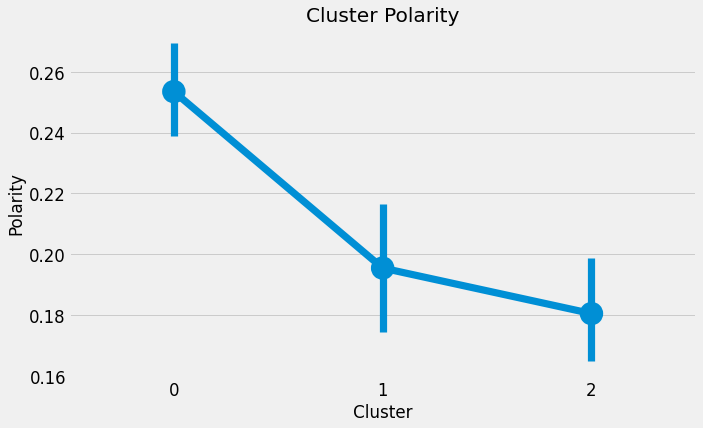

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = "KMeans", y = "Analysis", data = df2)
plt.xlabel("Cluster")
plt.ylabel("Polarity")
plt.title("Cluster Polarity")
plt.show()

In [ ]:
#sns.lmplot(x= "KMeans", y="Analysis", data = df2, x_estimator=np.mean);

**Prediction Analysis**
 What are the factors associated with the change in user identity and can we predict them?
---



In [ ]:
#https://github.com/dereksov/LibraryThing-Recommendation-System

In [ ]:
df3

,Analysis,Influence,Polarity,REPEAT_TIME,Subjectivity,author_id,favorabilty,followee_followers_rt,followers_count,following_count,folws_stat_foloing_rt,like_count,likes_tweets_rt,listed_count,quote_count,reply_count,retweet_count,sociability,tweet_count,KMeans,created_at,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_USER
31107,0,16.006726,0.000000,3,0.000000,2.743196e+08,0.693173,5000.000334,2991,4999,8946081,0,1.000052,35,0,0,0,8.517393,19294,2,2021-01-04,2021-01-04,2020-12-26,2020-12-28,2021-01-04,Y
31108,1,14.557258,0.136364,32,0.500000,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,Y
31109,0,6.869014,0.000000,3,0.000000,1.125630e+18,0.693219,257.032258,31,256,961,0,1.000143,0,0,0,0,5.553085,7006,1,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,Y
31110,0,11.573804,0.000000,9,0.000000,1.577883e+07,0.693160,949.003067,326,948,106276,0,1.000026,2,0,0,0,6.856465,38072,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,Y
31111,1,14.557258,0.136364,33,0.500000,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,-1,13.937702,-0.062500,19,0.312500,6.990230e+17,0.693154,5001.000941,1063,5000,1129969,0,1.000014,35,0,0,0,8.517593,69361,2,2020-12-29,2020-12-29,2020-12-22,2020-12-28,2021-01-04,Y
50915,0,15.852483,0.000000,25,0.000000,1.139270e+18,0.693163,4985.000361,2769,4984,7667361,0,1.000032,11,0,0,1,8.514389,31035,2,2020-12-29,2020-12-29,2020-12-21,2020-12-21,2021-01-04,Y
50916,1,14.096774,0.226190,8,0.289286,2.777102e+09,1.098623,1504.000869,1151,1503,1324801,1,2.000032,5,0,0,1,7.316549,30992,2,2020-12-29,2020-12-29,2020-12-26,2020-12-28,2021-01-04,Y
50917,0,16.621814,0.000000,14,0.000000,8.233130e+17,0.693152,4663.000246,4068,4662,16548624,0,1.000010,3,0,0,0,8.447629,101639,2,2020-12-29,2020-12-29,2020-12-24,2020-12-28,2021-01-04,Y


In [ ]:
from wordcloud.wordcloud import random_color_func
# Library
from collections import defaultdict
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize
import sklearn as skl
import tarfile
import json
import itertools

In [ ]:
df3.shape

(19583, 26)

In [ ]:
df = df3

In [ ]:
df.dtypes

Analysis                          int64
Influence                       float64
Polarity                        float64
REPEAT_TIME                       int64
Subjectivity                    float64
author_id                       float64
favorabilty                     float64
followee_followers_rt           float64
followers_count                   int64
following_count                   int64
folws_stat_foloing_rt             int64
like_count                        int64
likes_tweets_rt                 float64
listed_count                      int64
quote_count                       int64
reply_count                       int64
retweet_count                     int64
sociability                     float64
tweet_count                       int64
KMeans                            int32
created_at               datetime64[ns]
created_at_month                 object
cohort                           object
CohortGroup                      object
PostingPeriod                    object


In [ ]:
len(set(df['created_at']))

7

In [ ]:
df.groupby('Analysis')['author_id'].count().sort_values(ascending=False).head(10)

Analysis
 0    8045
 1    7878
-1    3660
Name: author_id, dtype: int64

In [ ]:
df.groupby('created_at')['author_id'].get_group('2021-01-04')

31107    2.743196e+08
31108    1.308570e+18
31109    1.125630e+18
31110    1.577883e+07
31111    1.308570e+18
             ...     
35079    9.324600e+17
35080    1.108880e+18
35081    1.046410e+18
35082    4.132841e+06
35083    1.727791e+07
Name: author_id, Length: 3936, dtype: float64

In [ ]:
sum(df.groupby('Analysis')['author_id'].count()<10)

0

In [ ]:
len([d for d in df['Analysis'] if d !=[]])

19583

In [ ]:
len(set(df['Analysis']))


3

In [ ]:
np.mean(df['Analysis'])

0.2153909002706429

In [ ]:
df.groupby('Analysis')['created_at'].count().sort_values(ascending=False).head(10)

Analysis
 0    8045
 1    7878
-1    3660
Name: created_at, dtype: int64

In [ ]:
np.mean(df.groupby('author_id')['created_at'].count()==1)

0.6756756756756757

In [ ]:
df.groupby('Analysis')['created_at'].count().sort_values(ascending=False)

Analysis
 0    8045
 1    7878
-1    3660
Name: created_at, dtype: int64

In [ ]:
train = df[:-1000].reset_index()
#train['tweet_count'] = train['tweet_count'].apply(len)
train = train.drop(columns='index')
valid = df[-1000:].reset_index()
valid = valid[['created_at','author_id', 'Analysis', 'KMeans']]

In [ ]:
train.head(1)

,Analysis,Influence,Polarity,REPEAT_TIME,Subjectivity,author_id,favorabilty,followee_followers_rt,followers_count,following_count,folws_stat_foloing_rt,like_count,likes_tweets_rt,listed_count,quote_count,reply_count,retweet_count,sociability,tweet_count,KMeans,created_at,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_USER
0,0,16.006726,0.0,3,0.0,274319599.0,0.693173,5000.000334,2991,4999,8946081,0,1.000052,35,0,0,0,8.517393,19294,2,2021-01-04,2021-01-04,2020-12-26,2020-12-28,2021-01-04,Y


In [ ]:
valid.head(1)

,created_at,author_id,Analysis,KMeans
0,2020-12-29,2.312294e+09,1,0


In [ ]:
userList = set(train['author_id'])
workList = set(train['Analysis'])

# Utility data structures
reviewsPerUser = train.groupby('author_id')
reviewsPerWork = train.groupby('created_at')
usersPerWork = train.groupby('created_at')['author_id']
worksPerUser = train.groupby('author_id')['created_at']

# .get_group(str)

In [ ]:
train = train.fillna(0)

In [ ]:
workStarMean = train.groupby('created_at')['Analysis'].mean()

In [ ]:
userHelpMean = train.groupby('author_id')['Analysis'].mean()

In [ ]:
valid = valid.fillna(0)

In [ ]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom

def predictPlay(threshold, jacInput):
    
    if jacInput[0][0] >= threshold:
        return 1
    return 0

def mostSimilarFast(w, u):
    if w not in workList or u not in userList:
        return (0,w)
    similarities = []
    works = worksPerUser.get_group(u)
    gUsers = usersPerWork.get_group(w)
    candidateUsers = set()
    for w2 in works:
        g2users = usersPerWork.get_group(w2)
        sim = Jaccard(set(gUsers), set(g2users))
        similarities.append((sim,w2))
    similarities.sort(reverse=True)
    if similarities == []:
        return (0,w)
    return similarities[0]

In [ ]:
jacs = []
i = 0

for d in zip(valid['created_at'],valid['Analysis']):
    jacs.append(mostSimilarFast(d[0],d[1]))
    i += 1
    if i%1000==0:
        print(i)

1000


In [ ]:
valid['Jaccard'] = [j[0] for j in jacs]

In [ ]:
valid['Analysis'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      1
1     -1
2      0
3      0
4      0
      ..
995   -1
996    0
997    1
998    0
999    0
Name: Analysis, Length: 1000, dtype: int64>

In [ ]:
# count of unique values 
print(valid['Analysis'].nunique())

3


# Applying Classification/Prediction Models

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = df

In [ ]:
dataset = dataset[dataset.Analysis != 0]
dataset

,Analysis,Influence,Polarity,REPEAT_TIME,Subjectivity,author_id,favorabilty,followee_followers_rt,followers_count,following_count,folws_stat_foloing_rt,like_count,likes_tweets_rt,listed_count,quote_count,reply_count,retweet_count,sociability,tweet_count,KMeans,created_at,created_at_month,cohort,CohortGroup,PostingPeriod,REPEAT_USER
31108,1,14.557258,0.136364,32,0.500000,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,Y
31111,1,14.557258,0.136364,33,0.500000,1.308570e+18,0.693435,249.000690,1449,248,2099601,0,1.000577,14,0,0,0,5.521464,1734,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,Y
31112,-1,7.613819,-0.125000,4,0.687500,4.947951e+08,1.386524,335.022222,45,334,2025,2,3.000918,1,0,0,0,5.817177,1089,1,2021-01-04,2021-01-04,2020-12-21,2020-12-21,2021-01-04,Y
31114,1,12.187145,0.136364,1,0.500000,5.715196e+07,1.098635,1626.002257,443,1625,196249,1,2.000067,3,0,0,0,7.394494,14822,0,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,N
31116,1,17.978639,0.136364,1,0.500000,1.171970e+18,1.609439,8817.000125,8017,8816,64272289,3,4.000006,24,0,0,0,9.084550,168981,2,2021-01-04,2021-01-04,2021-01-04,2021-01-04,2021-01-04,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50910,-1,14.908282,-0.500000,22,0.300000,1.250970e+18,0.693174,2558.000579,1727,2557,2982529,0,1.000053,3,0,0,0,7.847372,18985,2,2020-12-29,2020-12-29,2020-12-20,2020-12-21,2021-01-04,Y
50911,1,6.439350,0.333333,10,0.400000,1.342950e+18,0.693704,204.040000,25,203,625,0,1.001115,0,0,0,0,5.323205,897,1,2020-12-29,2020-12-29,2020-12-29,2021-01-04,2021-01-04,Y
50912,-1,17.162213,-0.013889,14,0.438889,2.533122e+08,1.609441,4879.000188,5330,4878,28408900,3,4.000018,95,1,0,0,8.492901,56876,2,2020-12-29,2020-12-29,2020-12-20,2020-12-21,2021-01-04,Y
50914,-1,13.937702,-0.062500,19,0.312500,6.990230e+17,0.693154,5001.000941,1063,5000,1129969,0,1.000014,35,0,0,0,8.517593,69361,2,2020-12-29,2020-12-29,2020-12-22,2020-12-28,2021-01-04,Y


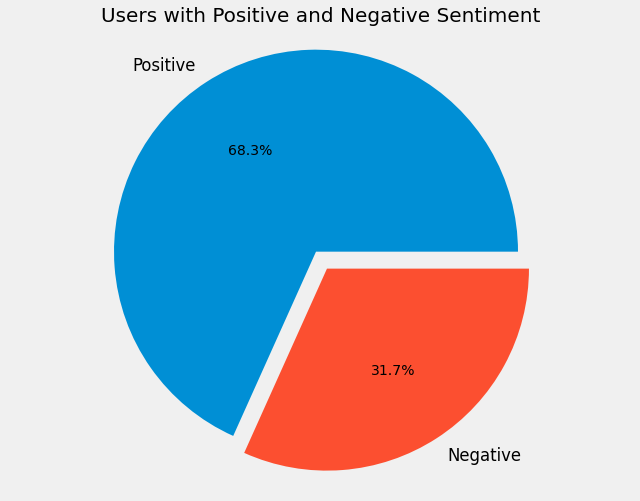

In [ ]:
labels = 'Positive', 'Negative'
sizes = [dataset.Analysis[dataset['Analysis']==1].count(), dataset.Analysis[dataset['Analysis']==-1].count()]
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=(0, 0.1), labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Users with Positive and Negative Sentiment", size = 20)
plt.show()

Our Categorical Data

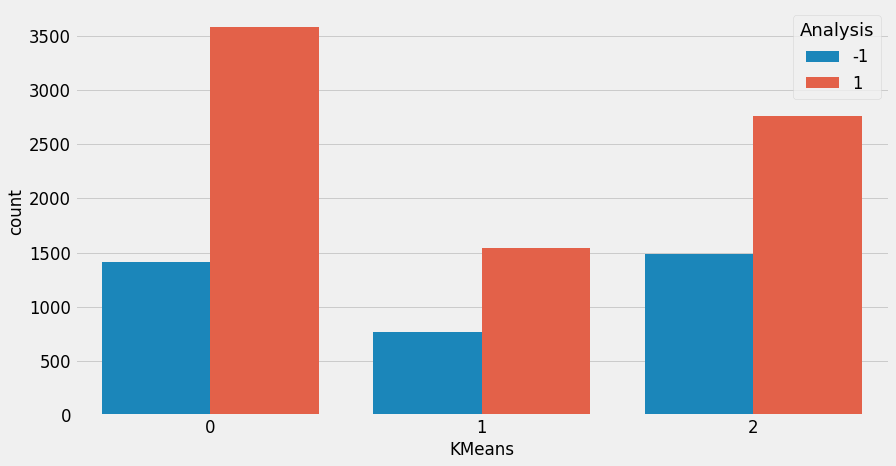

In [ ]:
plt.figure(figsize=(13,7))
sns.countplot(x='KMeans', hue = 'Analysis',data = dataset)

Continuous Data


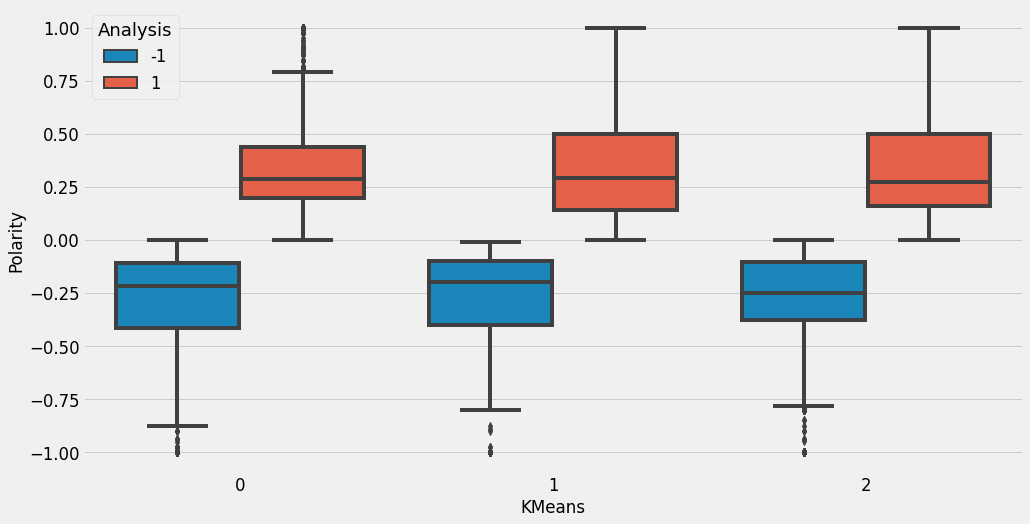

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(y='Polarity',x = 'KMeans', hue = 'Analysis',data = dataset)

In [ ]:
#plt.figure(figsize=(26, 10))
#sns.boxplot(y='Polarity',x = 'cohort', hue = 'KMeans',data = dataset)

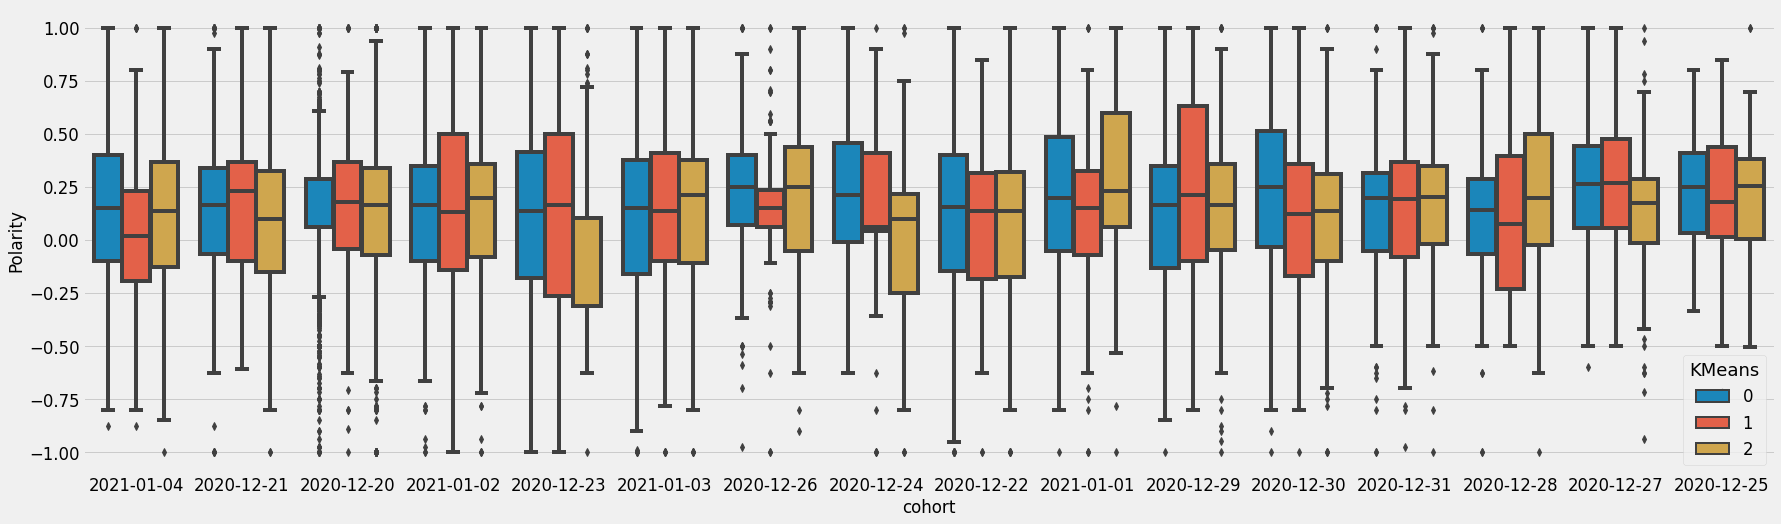

In [ ]:
plt.figure(figsize=(27, 8))
sns.boxplot(y='Polarity',x = 'cohort', hue = 'KMeans',data = dataset)

Split into dependent and independent variables

In [ ]:
dataset = dataset.drop(dataset.columns[[5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18,]], axis=1) 

In [ ]:
dataset = dataset.drop(dataset.columns[[10, 11,]], axis=1) 

In [ ]:
dataset = dataset[["REPEAT_USER", "cohort", "created_at_month", "created_at", "KMeans", "quote_count", "Subjectivity", "REPEAT_TIME", "Polarity", "Influence", "Analysis"]]

In [ ]:
dataset['REPEAT_USER'] = dataset['REPEAT_USER'].replace(['N','Y'],['0','1'])

In [ ]:
le=LabelEncoder()
dataset['created_at']=le.fit_transform(dataset['created_at'])
dataset['created_at_month']=le.fit_transform(dataset['created_at_month'])
dataset['cohort']=le.fit_transform(dataset['cohort'])


In [ ]:
dataset

,REPEAT_USER,cohort,created_at_month,created_at,KMeans,quote_count,Subjectivity,REPEAT_TIME,Polarity,Influence,Analysis
31108,1,15,6,6,0,0,0.500000,32,0.136364,14.557258,1
31111,1,15,6,6,0,0,0.500000,33,0.136364,14.557258,1
31112,1,1,6,6,1,0,0.687500,4,-0.125000,7.613819,-1
31114,0,15,6,6,0,0,0.500000,1,0.136364,12.187145,1
31116,0,15,6,6,2,0,0.500000,1,0.136364,17.978639,1
...,...,...,...,...,...,...,...,...,...,...,...
50910,1,0,0,0,2,0,0.300000,22,-0.500000,14.908282,-1
50911,1,9,0,0,1,0,0.400000,10,0.333333,6.439350,1
50912,1,0,0,0,2,1,0.438889,14,-0.013889,17.162213,-1
50914,1,2,0,0,2,0,0.312500,19,-0.062500,13.937702,-1


In [ ]:
### future exploreation- is there a correlation between repeat time and sentiment within a specific time frame?

Split into dependent and independent variables

In [ ]:
x = dataset.iloc[:,0:10].values # the first 10 columns of the dataframe
y = dataset.iloc[:,10].values  # the 10th column of the dataframe 

Normalize continuous variables using Standard Scaler

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)

Split into train and test sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8076, 10)
(3462, 10)
(8076,)
(3462,)


Apply ML Algorithms

Logistic Regression


In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_ypred=lr.predict(x_test)
lr_acc = sklearn.metrics.accuracy_score(lr_ypred,y_test)
print("Logistic Regression Accuracy: ")
print(lr_acc*100,"%")

Logistic Regression Accuracy: 
99.85557481224726 %


Naive Bayes


In [ ]:
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_ypred=nb.predict(x_test)
nb_acc = sklearn.metrics.accuracy_score(nb_ypred,y_test)
print("Naive Bayes Accuracy: ")
print(nb_acc*100,"%")

Naive Bayes Accuracy: 
92.89428076256499 %


Stochastic Gradient Descent


In [ ]:
sgd=SGDClassifier(loss='modified_huber',shuffle=True, random_state=15)
sgd.fit(x_train,y_train)
sgd_ypred=sgd.predict(x_test)
sgd_acc = sklearn.metrics.accuracy_score(sgd_ypred,y_test)
print("Stochastic Gradient Descent Accuracy: ")
print(sgd_acc*100,"%")

Stochastic Gradient Descent Accuracy: 
99.85557481224726 %


K-Nearest Neighbours


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn_ypred=knn.predict(x_test)
knn_acc = sklearn.metrics.accuracy_score(knn_ypred,y_test)
print("K-Nearest Neighbour Accuracy: ")
print(knn_acc*100,"%")

K-Nearest Neighbour Accuracy: 
96.01386481802426 %


Decision Tree


In [ ]:
dtree=DecisionTreeClassifier(max_depth=100,random_state=10,max_features=None, min_samples_leaf=100)
dtree.fit(x_train,y_train)
dtree_ypred=dtree.predict(x_test)
dtree_acc = sklearn.metrics.accuracy_score(dtree_ypred,y_test)
print("Decision Tree Accuracy: ")
print(dtree_acc*100,"%")

Decision Tree Accuracy: 
100.0 %


Random Forest


In [ ]:
rfm=RandomForestClassifier(n_estimators=200,oob_score=True,n_jobs=-1, random_state=20,max_features=None,min_samples_leaf=2)
rfm.fit(x_train,y_train)
rfm_ypred=rfm.predict(x_test)
rfm_acc = sklearn.metrics.accuracy_score(rfm_ypred,y_test)
print("Random Forest Accuracy: ")
print(rfm_acc*100,"%")

Random Forest Accuracy: 
100.0 %


Support Vector Machine


In [ ]:
svm=SVC(kernel="linear",C=0.025,random_state=None)
svm.fit(x_train,y_train)
svm_ypred=svm.predict(x_test)
svm_acc = sklearn.metrics.accuracy_score(svm_ypred,y_test)
print("Support Vector Machine Accuracy: ")
print(svm_acc*100,"%")

Support Vector Machine Accuracy: 
99.56672443674177 %


**ML Model Evaluation**


Classification Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
targetNames=['Positive', 'Negative']
print('For LR')
print(classification_report(y_test, lr_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For Naive Bayes')
print(classification_report(y_test, nb_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For SGD')
print(classification_report(y_test, sgd_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For KNN')
print(classification_report(y_test, knn_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For Decision Tree')
print(classification_report(y_test, dtree_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For Random Forest')
print(classification_report(y_test, rfm_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For SVM')
print(classification_report(y_test, svm_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')

For LR
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00      1085
    Negative       1.00      1.00      1.00      2377

    accuracy                           1.00      3462
   macro avg       1.00      1.00      1.00      3462
weighted avg       1.00      1.00      1.00      3462

-----------------------------------------------------------------
For Naive Bayes
              precision    recall  f1-score   support

    Positive       0.83      0.97      0.90      1085
    Negative       0.98      0.91      0.95      2377

    accuracy                           0.93      3462
   macro avg       0.91      0.94      0.92      3462
weighted avg       0.94      0.93      0.93      3462

-----------------------------------------------------------------
For SGD
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00      1085
    Negative       1.00      1.00      1.00      2377

    accuracy       

In [ ]:
cm_lr = confusion_matrix(y_test, lr_ypred)
print('For Logistic Regression')
print('Confusion Matrix: ')
print(cm_lr)
acc_lr = accuracy_score(y_test, lr_ypred)
pre_lr = precision_score(y_test, lr_ypred)
rec_lr = recall_score(y_test, lr_ypred)
f1_lr = f1_score(y_test, lr_ypred)
print('Accuracy Score: ',acc_lr)
print('Precision Score: ',pre_lr)
print('Recall Score: ',rec_lr)
print('F1 Score: ',f1_lr)

For Logistic Regression
Confusion Matrix: 
[[1081    4]
 [   1 2376]]
Accuracy Score:  0.9985557481224726
Precision Score:  0.9983193277310924
Recall Score:  0.9995793016407236
F1 Score:  0.9989489173849064


In [ ]:
cf_matrix = np.array([[600, 1],
                     [0, 30]])

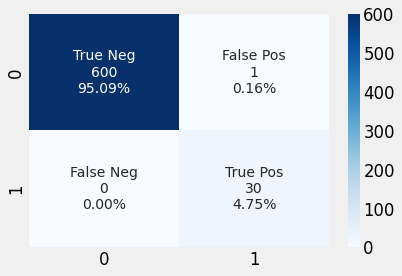

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
cm_nb = confusion_matrix(y_test, nb_ypred)
print('For Naive Bayes')
print('Confusion Matrix: ')
print(cm_nb)
acc_nb = accuracy_score(y_test, nb_ypred)
pre_nb = precision_score(y_test, nb_ypred)
rec_nb = recall_score(y_test, nb_ypred)
f1_nb = f1_score(y_test, nb_ypred)
print('Accuracy Score: ',acc_nb)
print('Precision Score: ',pre_nb)
print('Recall Score: ',rec_nb)
print('F1 Score: ',f1_nb)

For Naive Bayes
Confusion Matrix: 
[[1052   33]
 [ 213 2164]]
Accuracy Score:  0.92894280762565
Precision Score:  0.9849795175238962
Recall Score:  0.9103912494741271
F1 Score:  0.9462177525142107


In [ ]:
cf_matrix = np.array([[564, 37],
                     [246, 1059]])

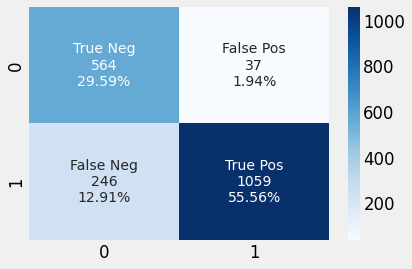

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
cm_sgd = confusion_matrix(y_test, sgd_ypred)
print('For Stochastic Gradient Descent')
print('Confusion Matrix: ')
print(cm_sgd)
acc_sgd = accuracy_score(y_test, sgd_ypred)
pre_sgd = precision_score(y_test, sgd_ypred)
rec_sgd = recall_score(y_test, sgd_ypred)
f1_sgd = f1_score(y_test, sgd_ypred)
print('Accuracy Score: ',acc_sgd)
print('Precision Score: ',pre_sgd)
print('Recall Score: ',rec_sgd)
print('F1 Score: ',f1_sgd)

For Stochastic Gradient Descent
Confusion Matrix: 
[[1082    3]
 [   2 2375]]
Accuracy Score:  0.9985557481224726
Precision Score:  0.9987384356602187
Recall Score:  0.9991586032814472
F1 Score:  0.9989484752891693


In [ ]:
cf_matrix = np.array([[599, 2],
                     [1, 1304]])

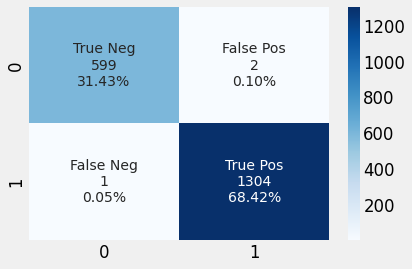

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
cm_knn = confusion_matrix(y_test, knn_ypred)
print('For KNN')
print('Confusion Matrix: ')
print(cm_knn)
acc_knn = accuracy_score(y_test, knn_ypred)
pre_knn = precision_score(y_test, knn_ypred)
rec_knn = recall_score(y_test, knn_ypred)
f1_knn = f1_score(y_test, knn_ypred)
print('Accuracy Score: ',acc_knn)
print('Precision Score: ',pre_knn)
print('Recall Score: ',rec_knn)
print('F1 Score: ',f1_knn)

For KNN
Confusion Matrix: 
[[1005   80]
 [  58 2319]]
Accuracy Score:  0.9601386481802426
Precision Score:  0.9666527719883284
Recall Score:  0.9755994951619689
F1 Score:  0.9711055276381909


In [ ]:
cf_matrix = np.array([[537, 64],
                     [23, 1282]])

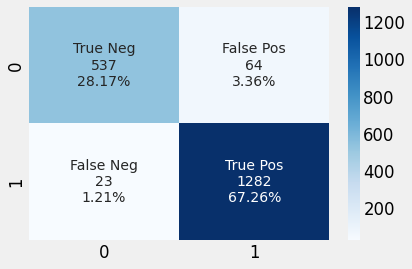

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
cm_dtree = confusion_matrix(y_test, dtree_ypred)
print('For Decision Tree')
print('Confusion Matrix: ')
print(cm_dtree)
acc_dtree = accuracy_score(y_test, dtree_ypred)
pre_dtree = precision_score(y_test, dtree_ypred)
rec_dtree = recall_score(y_test, dtree_ypred)
f1_dtree = f1_score(y_test, dtree_ypred)
print('Accuracy Score: ',acc_dtree)
print('Precision Score: ',pre_dtree)
print('Recall Score: ',rec_dtree)
print('F1 Score: ',f1_dtree)

For Decision Tree
Confusion Matrix: 
[[1085    0]
 [   0 2377]]
Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0


In [ ]:
cf_matrix = np.array([[601, 0],
                     [0, 1305]])

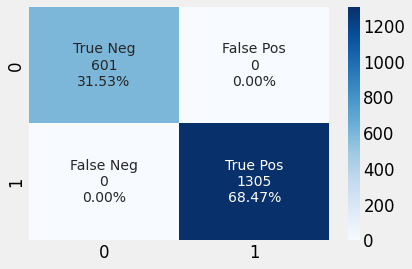

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
cm_rfm = confusion_matrix(y_test, rfm_ypred)
print('For Random Forest')
print('Confusion Matrix: ')
print(cm_rfm)
acc_rfm = accuracy_score(y_test, rfm_ypred)
pre_rfm = precision_score(y_test, rfm_ypred)
rec_rfm = recall_score(y_test, rfm_ypred)
f1_rfm = f1_score(y_test, rfm_ypred)
print('Accuracy Score: ',acc_rfm)
print('Precision Score: ',pre_rfm)
print('Recall Score: ',rec_rfm)
print('F1 Score: ',f1_rfm)

For Random Forest
Confusion Matrix: 
[[1085    0]
 [   0 2377]]
Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0


In [ ]:
cf_matrix = np.array([[601, 0],
                     [0, 1305]])

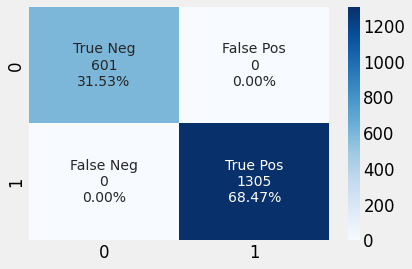

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracies= {"LR": lr_acc, 
             "Naive": nb_acc, 
             "SGD": sgd_acc, 
             "kNN": knn_acc, 
             "DT": dtree_acc, 
             "RFM": rfm_acc, 
             }

precisions = {"LR": pre_lr,  
             "Naive": pre_nb, 
             "SGD": pre_sgd,
             "kNN": pre_knn, 
             "DT": pre_dtree,
            "RFM": pre_rfm,
             }

recalls = {"LR": rec_lr,  
             "Naive": rec_nb, 
             "SGD": rec_sgd,
             "kNN": rec_knn, 
             "DT": rec_dtree,
            "RFM": rec_rfm,
             }

f1s = {"LR": f1_lr,  
        "Naive": f1_nb, 
        "SGD": f1_sgd,
        "kNN": f1_knn, 
        "DT": f1_dtree,
      "RFM": f1_rfm,
        }

Classification Evaluation Metrics

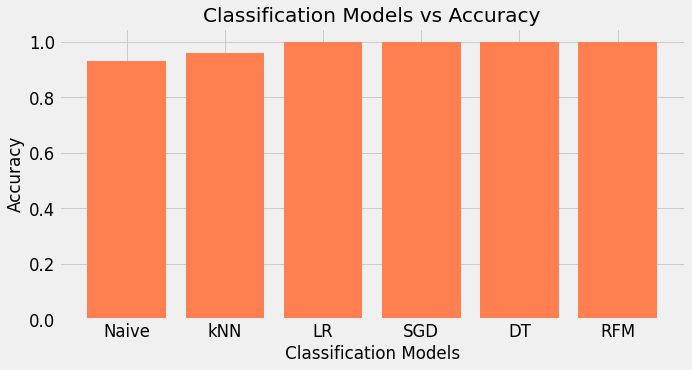

In [ ]:
lists = sorted(accuracies.items(), key=lambda x: x[1]*100)
plt.figure(figsize=(10,5))
plt.bar(*zip(*lists), color="coral")
plt.title('Classification Models vs Accuracy')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()

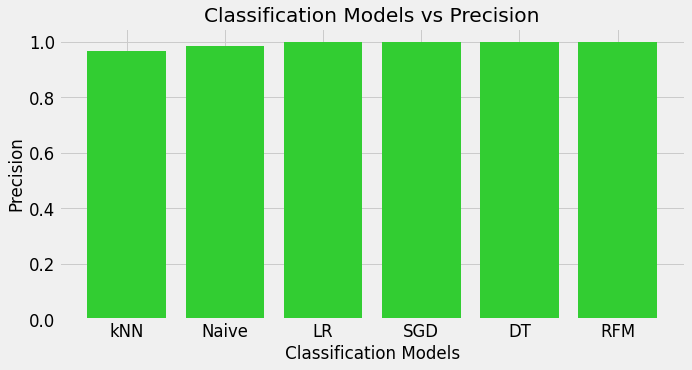

In [ ]:
lists = sorted(precisions.items(), key=lambda x: x[1]*100)
plt.figure(figsize=(10,5))
plt.bar(*zip(*lists), color="limegreen")
plt.title('Classification Models vs Precision')
plt.xlabel('Classification Models')
plt.ylabel('Precision')
plt.show()

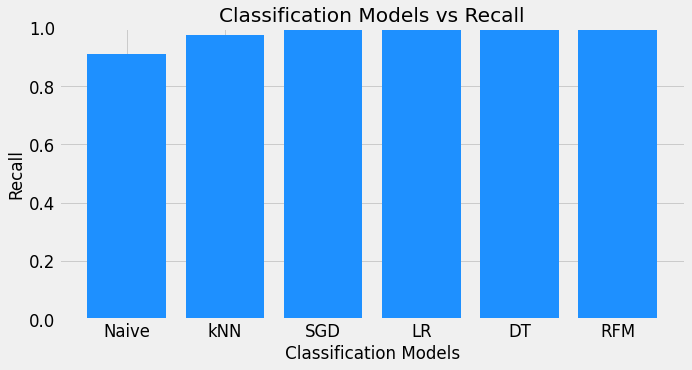

In [ ]:
lists = sorted(recalls.items(), key=lambda x: x[1]*100)
plt.figure(figsize=(10,5))
plt.bar(*zip(*lists), color="dodgerblue")
plt.ylim(0,1)
plt.title('Classification Models vs Recall')
plt.xlabel('Classification Models')
plt.ylabel('Recall')
plt.show()

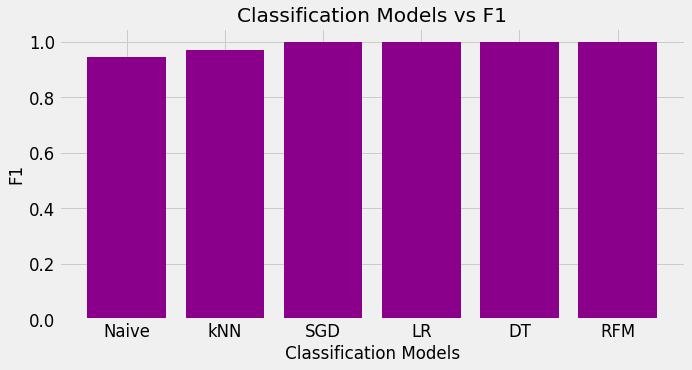

In [ ]:
lists = sorted(f1s.items(), key=lambda x: x[1]*100)
plt.figure(figsize=(10,5))
plt.bar(*zip(*lists), color="darkmagenta")
plt.title('Classification Models vs F1')
plt.xlabel('Classification Models')
plt.ylabel('F1')
plt.show()

Apply Deep Learning Models

Artificial Neural Networks

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=1,activation='sigmoid'))
ann_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
ann_model.fit(x_train,y_train,batch_size=32,epochs=100)
acc= ann_model.evaluate(x_train, y_train)
print("ANN Model Accuracy: ")
ann_acc=acc[1]
print(ann_acc*100,"%")

Epoch 1/100
253/253 [==============================] - 7s 5ms/step - loss: -0.5305 - accuracy: 0.0658
Epoch 2/100
253/253 [==============================] - 1s 4ms/step - loss: -77.1555 - accuracy: 0.4421
Epoch 3/100
253/253 [==============================] - 1s 4ms/step - loss: -1511.1632 - accuracy: 0.4969
Epoch 4/100
253/253 [==============================] - 1s 4ms/step - loss: -15394.0566 - accuracy: 0.5114
Epoch 5/100
253/253 [==============================] - 1s 4ms/step - loss: -98312.7812 - accuracy: 0.5232
Epoch 6/100
253/253 [==============================] - 1s 4ms/step - loss: -462957.4062 - accuracy: 0.5293
Epoch 7/100
253/253 [==============================] - 1s 4ms/step - loss: -1745559.1250 - accuracy: 0.5322
Epoch 8/100
253/253 [==============================] - 1s 4ms/step - loss: -5715867.5000 - accuracy: 0.5343
Epoch 9/100
253/253 [==============================] - 1s 4ms/step - loss: -16230572.0000 - accuracy: 0.5363
Epoch 10/100
253/253 [========================

Additional reshaping for CNN and LSTM

In [ ]:
x_train = np.random.uniform(0,1, (7000,10))
y_train = np.random.randint(0,2, 7000)

x_train = np.expand_dims(x_train, axis=1)
x_test = np.expand_dims(x_test, axis=1)

Convolutional Neural Networks

In [ ]:
inp = Input(shape=(1,10))
conv2 = Conv1D(filters=128, kernel_size=5, activation='relu', padding='same')(inp)
drop21 = Dropout(0.5)(conv2)
conv22 = Conv1D(filters=64, kernel_size=5, activation='relu', padding='same')(drop21)
drop22 = Dropout(0.5)(conv22)
pool2 = Flatten()(drop22)
out = Dense(2, activation='softmax')(pool2)
cnn_model = Model(inp, out)
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn_model.fit(x_train, y_train, epochs=100)
acc= cnn_model.evaluate(x_train, y_train)
print("CNN Model Accuracy: ")
cnn_acc=acc[1]
print(cnn_acc*100,"%")

Epoch 1/100
219/219 [==============================] - 10s 3ms/step - loss: 0.6946 - accuracy: 0.4981
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.5079
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.5044
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.5050
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5076
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5030
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5051
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 10/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6927 - accur

Long Short-Term Memory RNN

In [ ]:
lstm_model=Sequential()
lstm_model.add(Bidirectional(LSTM(100, return_sequences=False), input_shape=(1, 10)))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(lstm_model.summary())
history = lstm_model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=100)
acc= lstm_model.evaluate(x_train, y_train)
print("LSTM Model Accuracy: ")
lstm_acc=acc[1]
print(lstm_acc*100,"%")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 200)              88800     
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 201       
                                                                 
Total params: 89,001
Trainable params: 89,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
70/70 [==============================] - 5s 18ms/step - loss: 0.6937 - accuracy: 0.4943 - val_loss: 0.6987 - val_accuracy: 0.3336
Epoch 2/20
70/70 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5091 - va

DL Model Evaluation

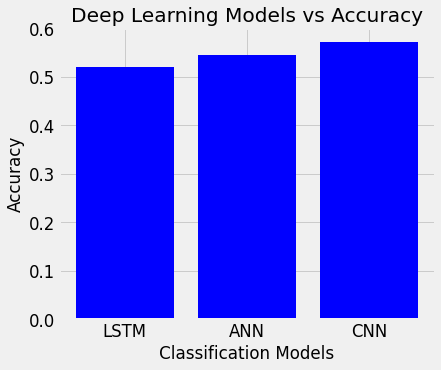

In [ ]:
accuracies= {"ANN": ann_acc, 
             "CNN": cnn_acc, 
             "LSTM": lstm_acc, 
             }
lists = sorted(accuracies.items(), key=lambda x: x[1]*100)
plt.figure(figsize=(6,5))
plt.bar(*zip(*lists), color="blue")
plt.title('Deep Learning Models vs Accuracy')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()

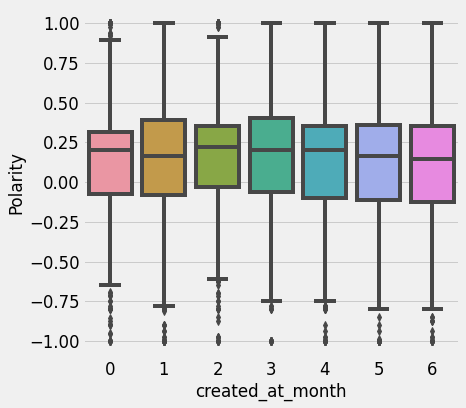

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='created_at_month',y='Polarity', data=dataset)